# **Οπτικοποίηση Ασθενών με Επαναλαμβανόμενα Χαμηλή Ακρίβεια Μοντέλου για H&Y**

## **Σκοπός**

Ο στόχος του παρόντος notebook είναι η οπτική ανάδειξη των ασθενών για τους οποίους τα μοντέλα ταξινόμησης παρουσίασαν **συστηματικά χαμηλή ακρίβεια** όσον αφορά την πρόβλεψη των κλινικών μεταβλητών.  
Η απεικόνιση αυτή βοηθά στον εντοπισμό περιπτώσεων που ενδέχεται να παρουσιάζουν **μη τυπικά ακουστικά πρότυπα** ή να περιλαμβάνουν **μη γραμμικές, δύσκολες προς μοντελοποίηση πληροφορίες**.

## **Τι κάνει ο κώδικας**

- Κατασκευάζει έναν πίνακα με τους 20 ασθενείς που εμφανίζονται συχνότερα με χαμηλή ακρίβεια ταξινόμησης από τα στατιστικά ή ML μοντέλα.  
- Δημιουργεί ένα **κυκλικό ραβδογράφημα (radial bar chart)** με τις τιμές εμφάνισης.  
- Εμφανίζει τα ονόματα των ασθενών και τον αριθμό φορών που καταγράφηκαν με χαμηλή ακρίβεια.  
- Αποθηκεύει το γράφημα σε αρχείο εικόνας **.png** για μελλοντική χρήση.

## **Σημασία**

Η αναγνώριση των συγκεκριμένων ασθενών μπορεί να συμβάλει:

- Στη **βελτίωση της ερμηνείας** των αποτελεσμάτων.  
- Στον **επανασχεδιασμό μοντέλων** για την κάλυψη δύσκολων περιπτώσεων (edge cases).  
- Στον εντοπισμό πιθανών **βιοδεικτών μη γραμμικής συμπεριφοράς** στα ηχητικά χαρακτηριστικά.


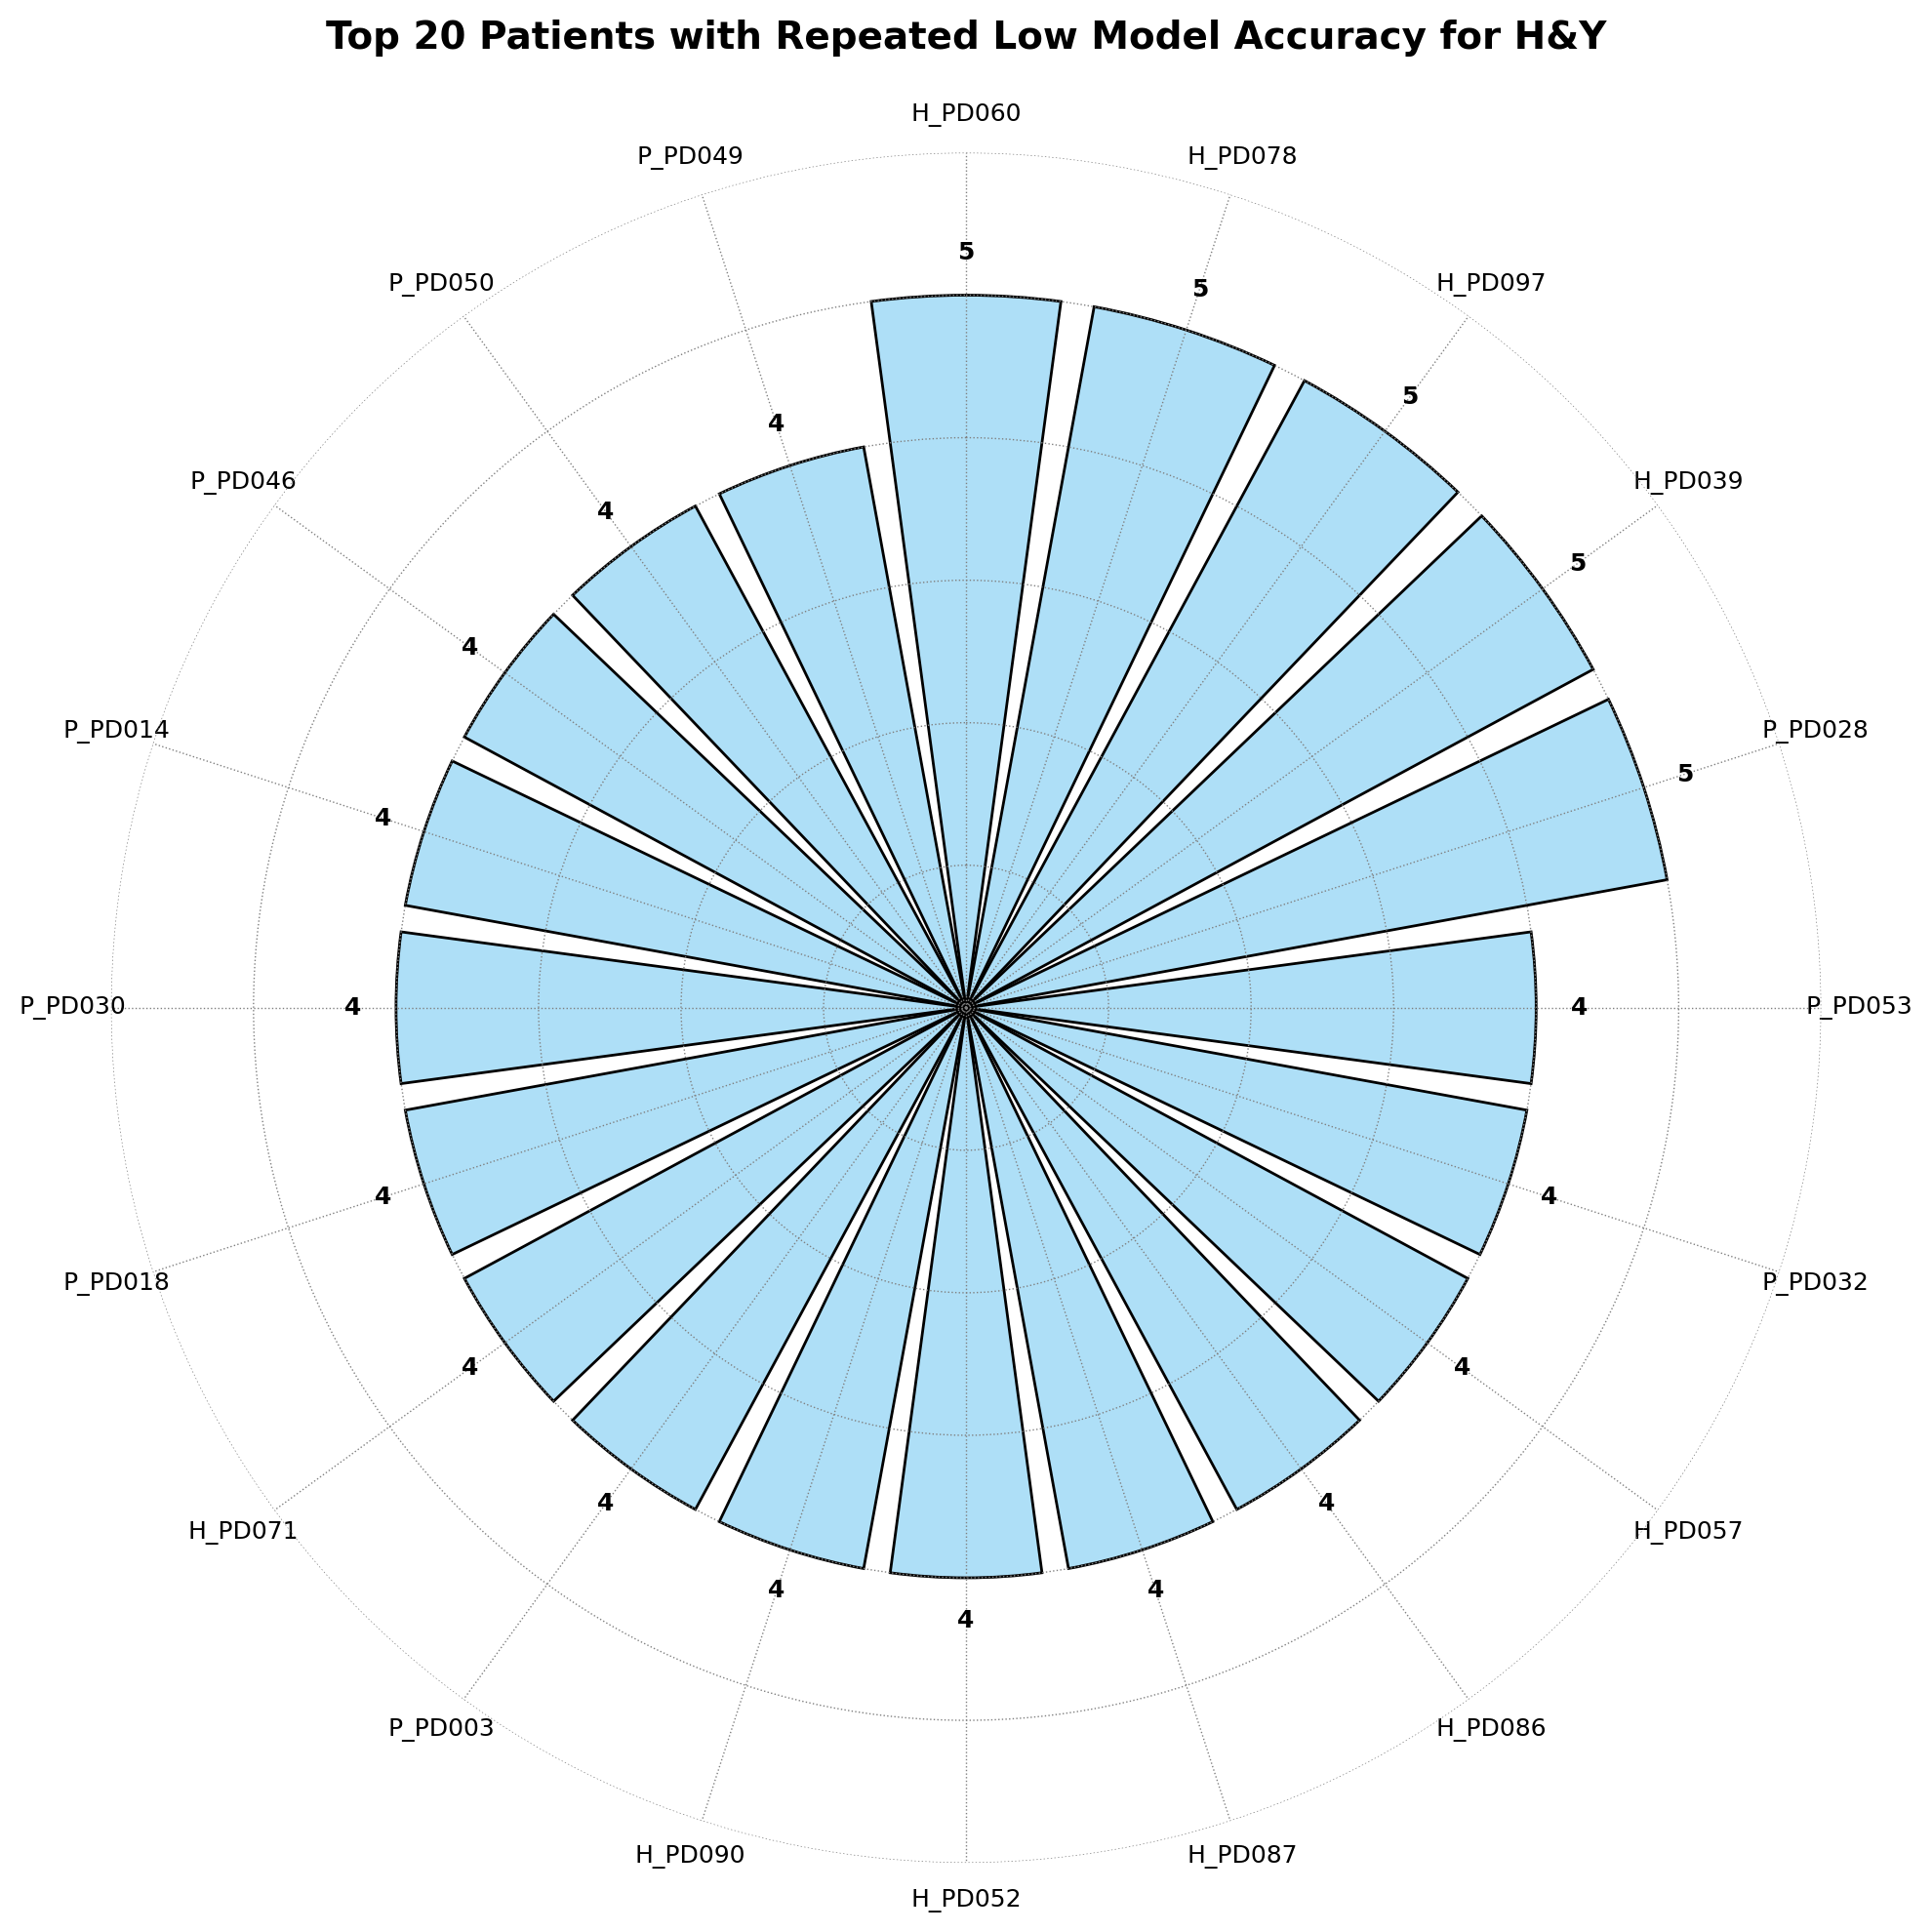

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Δεδομένα – Top 20
data = {
    'Patient': [
        'H_PD060', 'H_PD078', 'H_PD097', 'H_PD039', 'P_PD028',
        'P_PD053', 'P_PD032', 'H_PD057', 'H_PD086', 'H_PD087',
        'H_PD052', 'H_PD090', 'P_PD003', 'H_PD071', 'P_PD018',
        'P_PD030', 'P_PD014', 'P_PD046', 'P_PD050', 'P_PD049'
    ],
    'Low Accuracy Count': [
        5, 5, 5, 5, 5,
        4, 4, 4, 4, 4,
        4, 4, 4, 4, 4,
        4, 4, 4, 4, 4
    ]
}
df = pd.DataFrame(data)

# Βασικά στοιχεία
labels = df['Patient']
values = df['Low Accuracy Count']
num_bars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()

# Δημιουργία figure
plt.figure(figsize=(10, 10), dpi=200)
ax = plt.subplot(111, polar=True)

# Μπάρες
bars = ax.bar(
    angles,
    values,
    width=2*np.pi/num_bars * 0.85,
    bottom=0,
    color='#AEDFF7',  # pastel baby blue
    edgecolor='black',
    linewidth=1
)

# Κατεύθυνση - περιστροφή
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, max(values) + 1)

# Labels (ονόματα)
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=9)

# Απόκρυψη κυκλικών γραμμών και y-axis
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
ax.grid(color='gray', linestyle='dotted', linewidth=0.5)

# Τίτλος
plt.title('Top 20 Patients with Repeated Low Model Accuracy for H&Y', fontsize=14, fontweight='bold', pad=20)

# Τιμές πάνω στις μπάρες
for angle, value in zip(angles, values):
    ax.text(
        angle,
        value + 0.3,  # μικρή απόσταση από την κορυφή
        str(value),
        ha='center',
        va='center',
        fontsize=9,
        color='black',
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig("radial_top20_patients_H&Y.png", dpi=300, bbox_inches='tight')
plt.show()



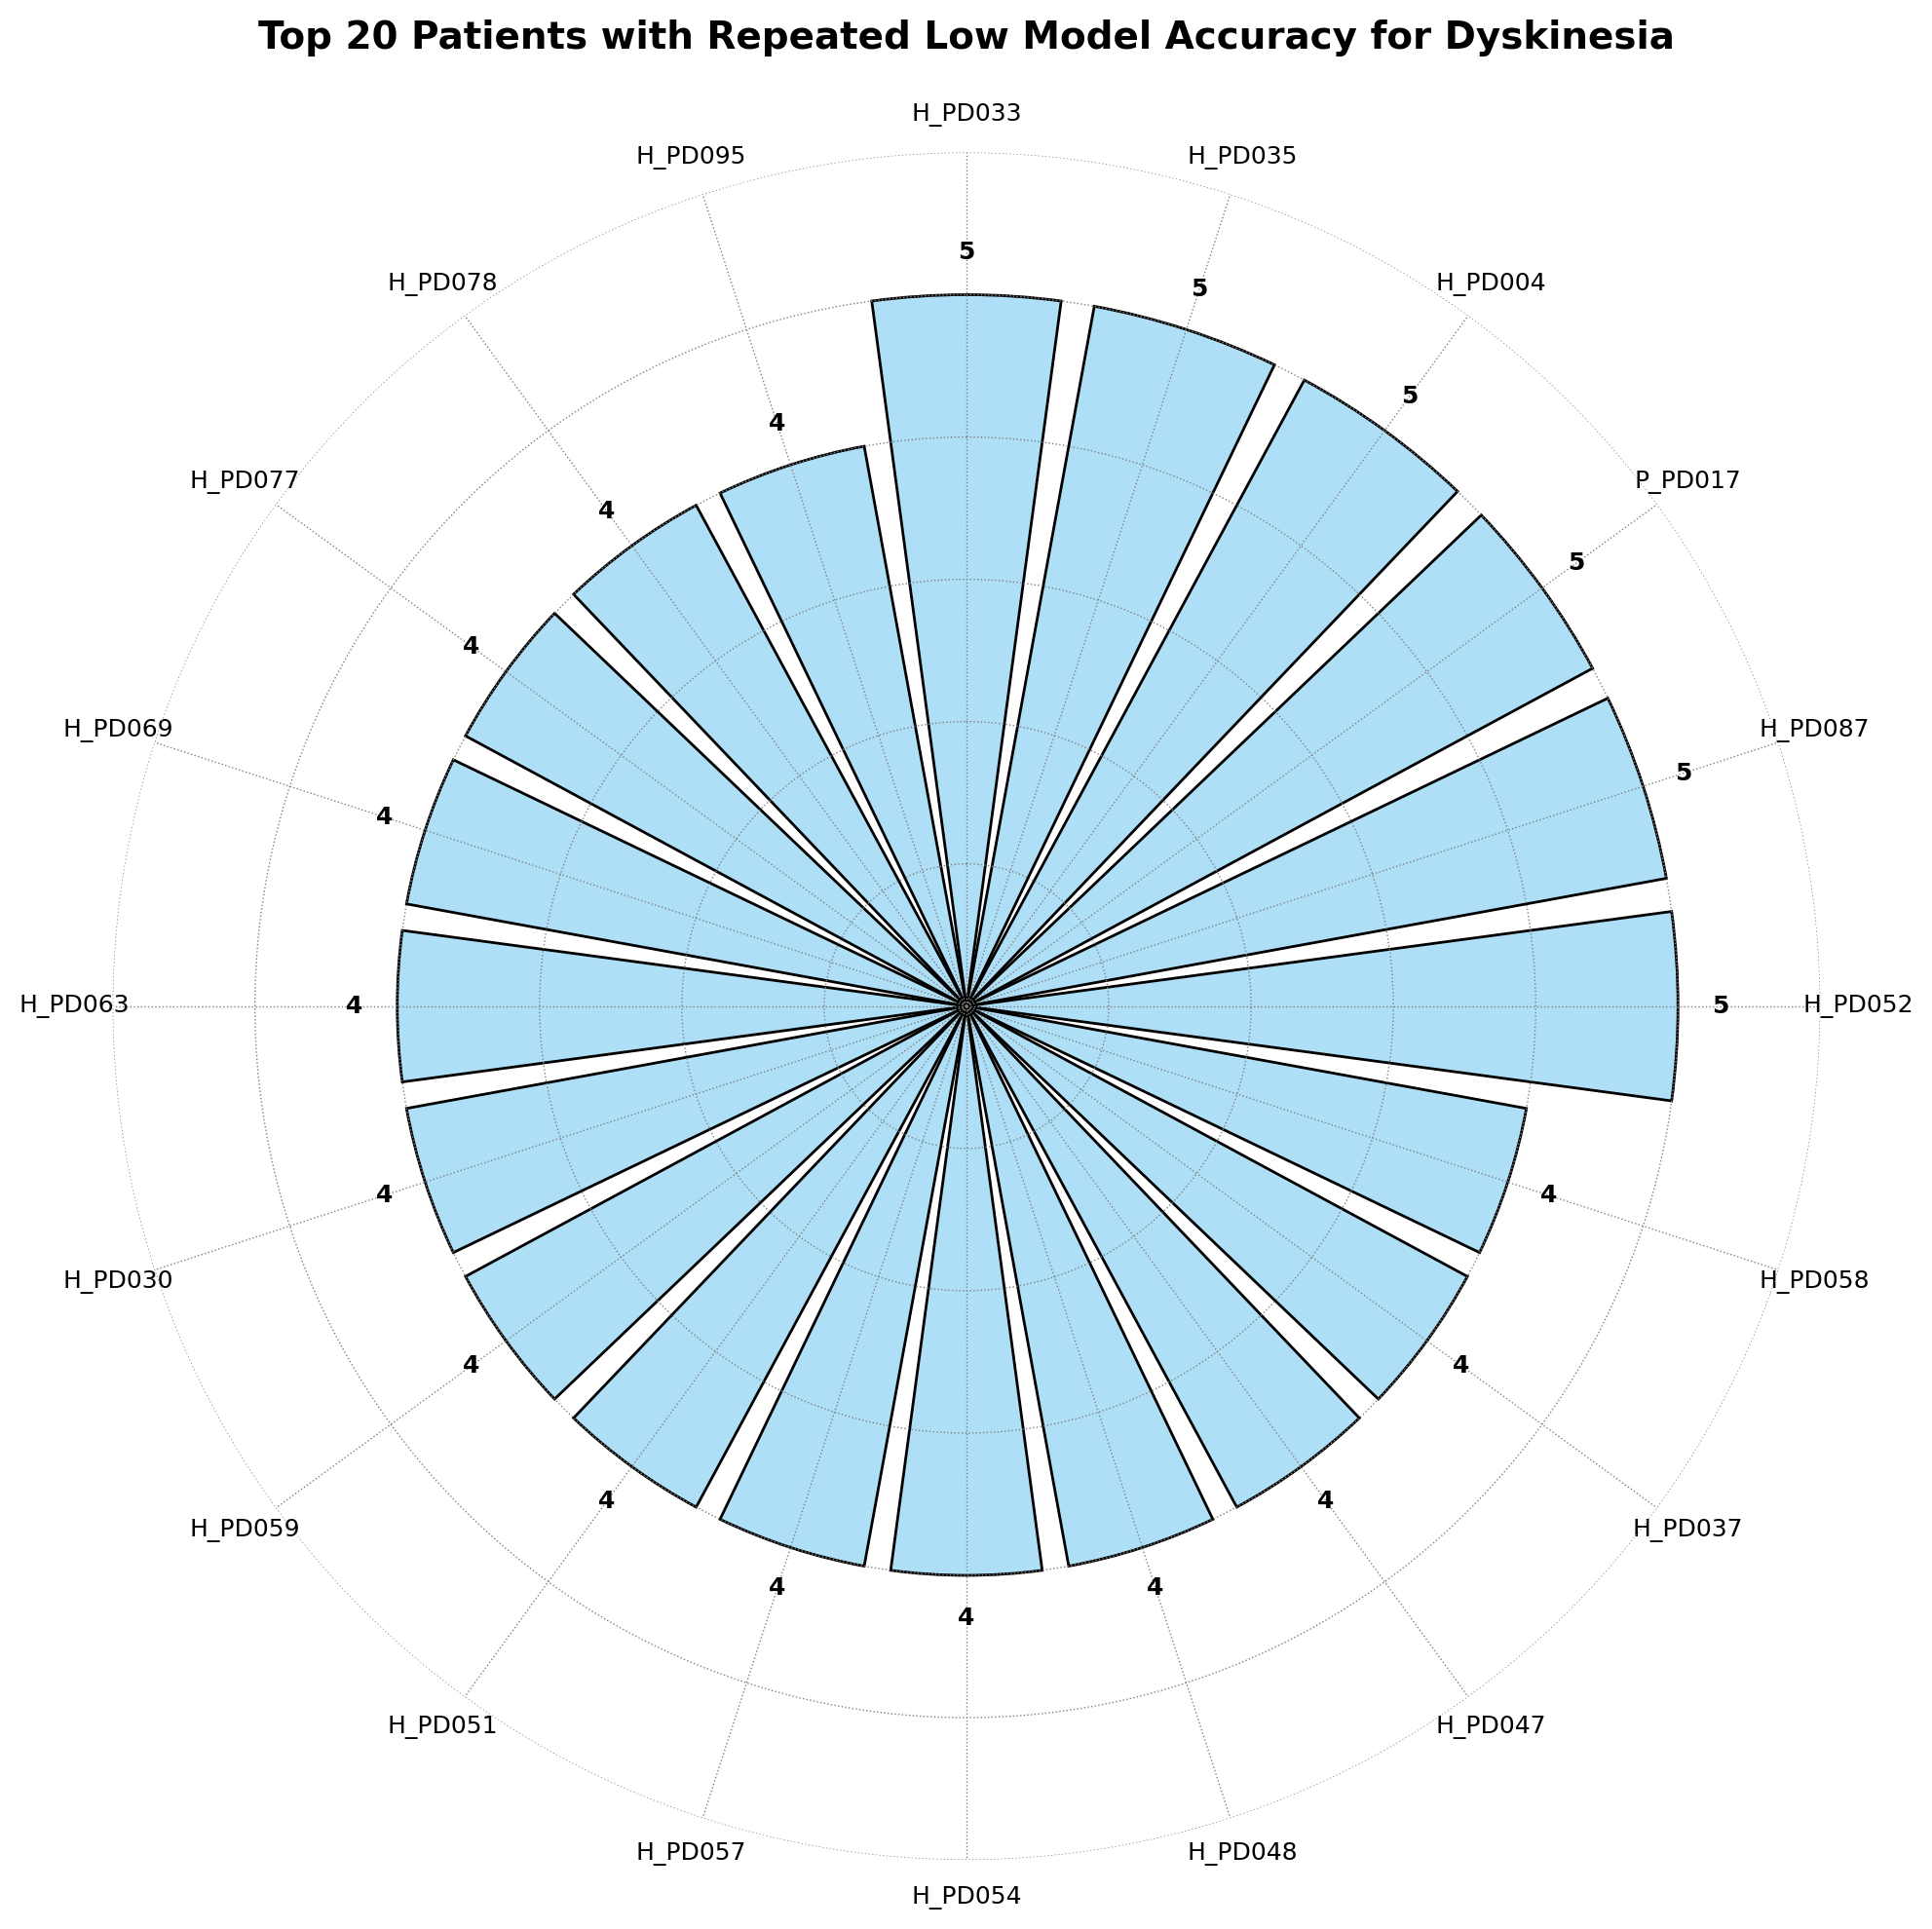

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Δεδομένα – Top 20
data = {
    'Patient': [
        'H_PD033', 'H_PD035', 'H_PD004', 'P_PD017', 'H_PD087',
        'H_PD052', 'H_PD058', 'H_PD037', 'H_PD047', 'H_PD048',
        'H_PD054', 'H_PD057', 'H_PD051', 'H_PD059', 'H_PD030',
        'H_PD063', 'H_PD069', 'H_PD077', 'H_PD078', 'H_PD095'
    ],
    'Low Accuracy Count': [
        5, 5, 5, 5, 5,
        5, 4, 4, 4, 4,
        4, 4, 4, 4, 4,
        4, 4, 4, 4, 4
    ]
}
df = pd.DataFrame(data)

# Βασικά στοιχεία
labels = df['Patient']
values = df['Low Accuracy Count']
num_bars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()

# Δημιουργία figure
plt.figure(figsize=(10, 10), dpi=200)
ax = plt.subplot(111, polar=True)

# Μπάρες
bars = ax.bar(
    angles,
    values,
    width=2*np.pi/num_bars * 0.85,
    bottom=0,
    color='#AEDFF7',  # pastel baby blue
    edgecolor='black',
    linewidth=1
)

# Κατεύθυνση - περιστροφή
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, max(values) + 1)

# Labels (ονόματα)
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=9)

# Απόκρυψη κυκλικών γραμμών και y-axis
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
ax.grid(color='gray', linestyle='dotted', linewidth=0.5)

# Τίτλος
plt.title('Top 20 Patients with Repeated Low Model Accuracy for Dyskinesia', fontsize=14, fontweight='bold', pad=20)

# Τιμές πάνω στις μπάρες
for angle, value in zip(angles, values):
    ax.text(
        angle,
        value + 0.3,  # μικρή απόσταση από την κορυφή
        str(value),
        ha='center',
        va='center',
        fontsize=9,
        color='black',
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig("radial_top20_patients_Dyskinesia.png", dpi=300, bbox_inches='tight')
plt.show()



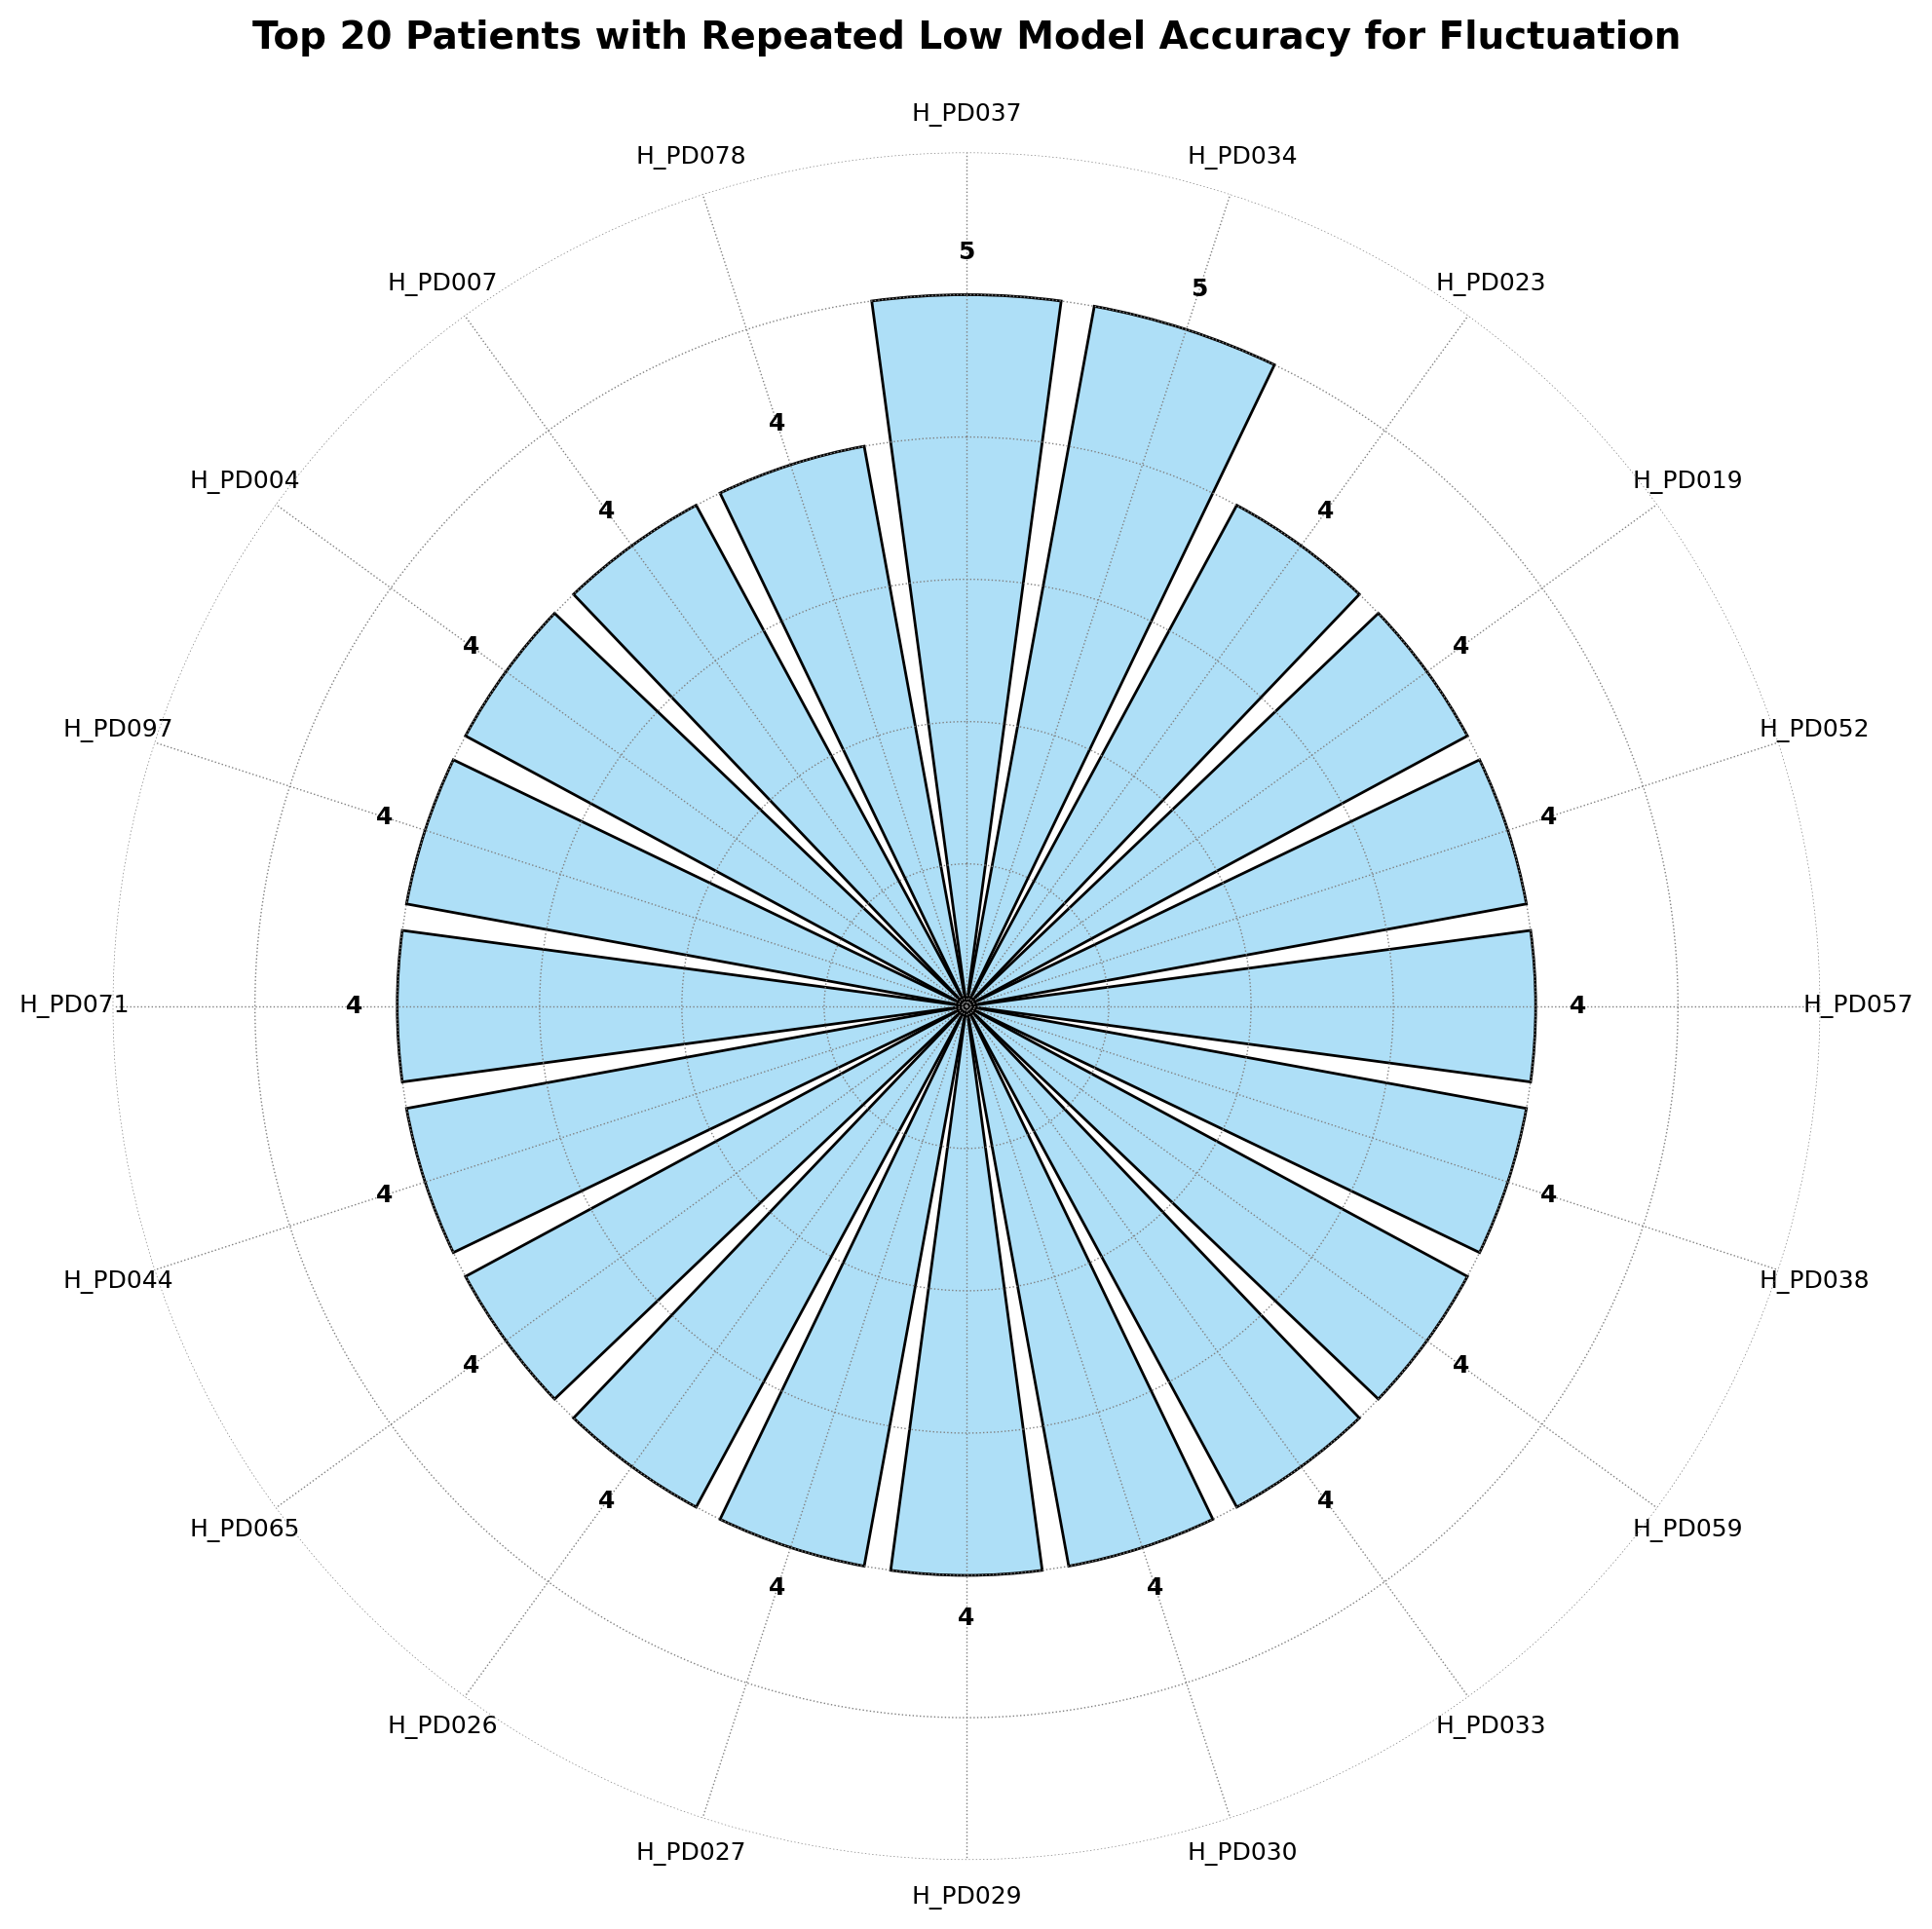

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Δεδομένα – Top 20
data = {
    'Patient': [
        'H_PD037', 'H_PD034', 'H_PD023', 'H_PD019', 'H_PD052',
        'H_PD057', 'H_PD038', 'H_PD059', 'H_PD033', 'H_PD030',
        'H_PD029', 'H_PD027', 'H_PD026', 'H_PD065', 'H_PD044',
        'H_PD071', 'H_PD097', 'H_PD004', 'H_PD007', 'H_PD078'
    ],
    'Low Accuracy Count': [
        5, 5, 4, 4, 4,
        4, 4, 4, 4, 4,
        4, 4, 4, 4, 4,
        4, 4, 4, 4, 4
    ]
}
df = pd.DataFrame(data)

# Βασικά στοιχεία
labels = df['Patient']
values = df['Low Accuracy Count']
num_bars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()

# Δημιουργία figure
plt.figure(figsize=(10, 10), dpi=200)
ax = plt.subplot(111, polar=True)

# Μπάρες
bars = ax.bar(
    angles,
    values,
    width=2*np.pi/num_bars * 0.85,
    bottom=0,
    color='#AEDFF7',  # pastel baby blue
    edgecolor='black',
    linewidth=1
)

# Κατεύθυνση - περιστροφή
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, max(values) + 1)

# Labels (ονόματα)
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=9)

# Απόκρυψη κυκλικών γραμμών και y-axis
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
ax.grid(color='gray', linestyle='dotted', linewidth=0.5)

# Τίτλος
plt.title('Top 20 Patients with Repeated Low Model Accuracy for Fluctuation', fontsize=14, fontweight='bold', pad=20)

# Τιμές πάνω στις μπάρες
for angle, value in zip(angles, values):
    ax.text(
        angle,
        value + 0.3,  # μικρή απόσταση από την κορυφή
        str(value),
        ha='center',
        va='center',
        fontsize=9,
        color='black',
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig("radial_top20_patients_Fluctuation.png", dpi=300, bbox_inches='tight')
plt.show()



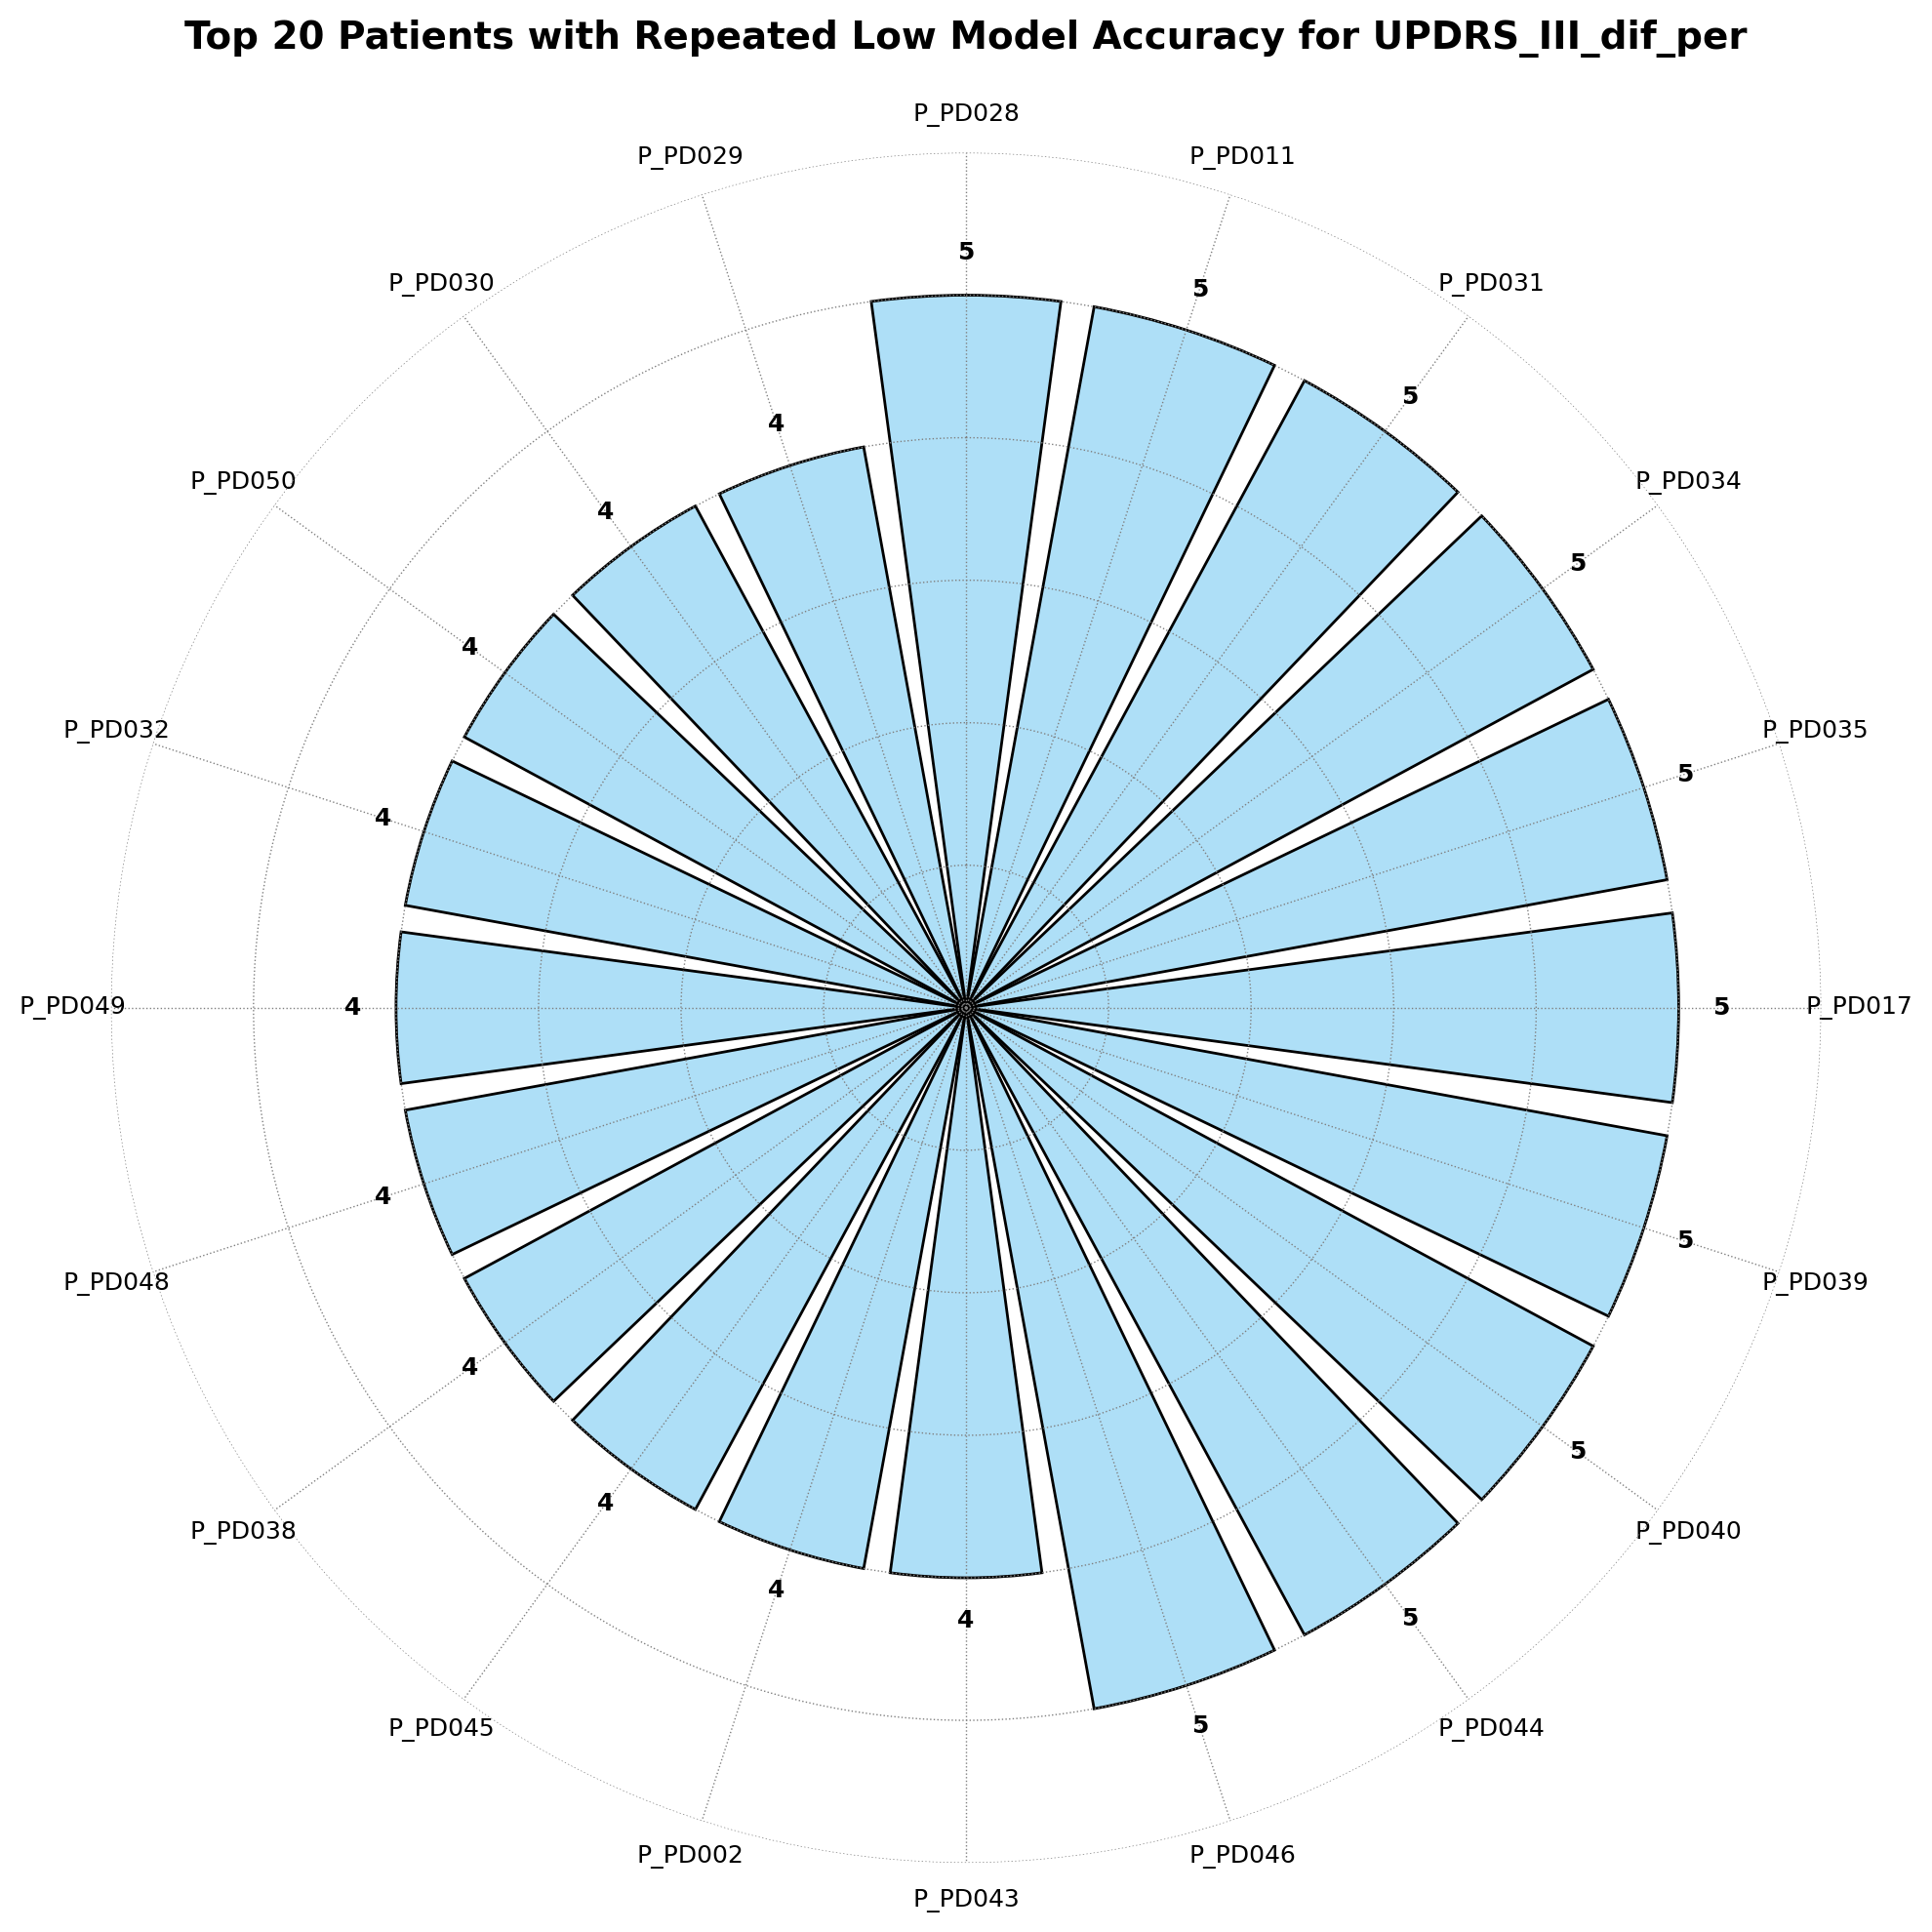

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Δεδομένα – Top 20

data = {
    'Patient': [
        'P_PD028', 'P_PD011', 'P_PD031', 'P_PD034', 'P_PD035',
        'P_PD017', 'P_PD039', 'P_PD040', 'P_PD044', 'P_PD046',
        'P_PD043', 'P_PD002', 'P_PD045', 'P_PD038', 'P_PD048',
        'P_PD049', 'P_PD032', 'P_PD050', 'P_PD030', 'P_PD029'
    ],
    'Low Accuracy Count': [
        5, 5, 5, 5, 5,
        5, 5, 5, 5, 5,
        4, 4, 4, 4, 4,
        4, 4, 4, 4, 4
    ]
}
df = pd.DataFrame(data)

# Βασικά στοιχεία
labels = df['Patient']
values = df['Low Accuracy Count']
num_bars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()

# Δημιουργία figure
plt.figure(figsize=(10, 10), dpi=200)
ax = plt.subplot(111, polar=True)

# Μπάρες
bars = ax.bar(
    angles,
    values,
    width=2*np.pi/num_bars * 0.85,
    bottom=0,
    color='#AEDFF7',  # pastel baby blue
    edgecolor='black',
    linewidth=1
)

# Κατεύθυνση - περιστροφή
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, max(values) + 1)

# Labels (ονόματα)
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=9)

# Απόκρυψη κυκλικών γραμμών και y-axis
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
ax.grid(color='gray', linestyle='dotted', linewidth=0.5)

# Τίτλος
plt.title('Top 20 Patients with Repeated Low Model Accuracy for UPDRS_III_dif_per', fontsize=14, fontweight='bold', pad=20)

# Τιμές πάνω στις μπάρες
for angle, value in zip(angles, values):
    ax.text(
        angle,
        value + 0.3,  # μικρή απόσταση από την κορυφή
        str(value),
        ha='center',
        va='center',
        fontsize=9,
        color='black',
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig("radial_top20_patients_UPDRS_III_dif_per.png", dpi=300, bbox_inches='tight')
plt.show()



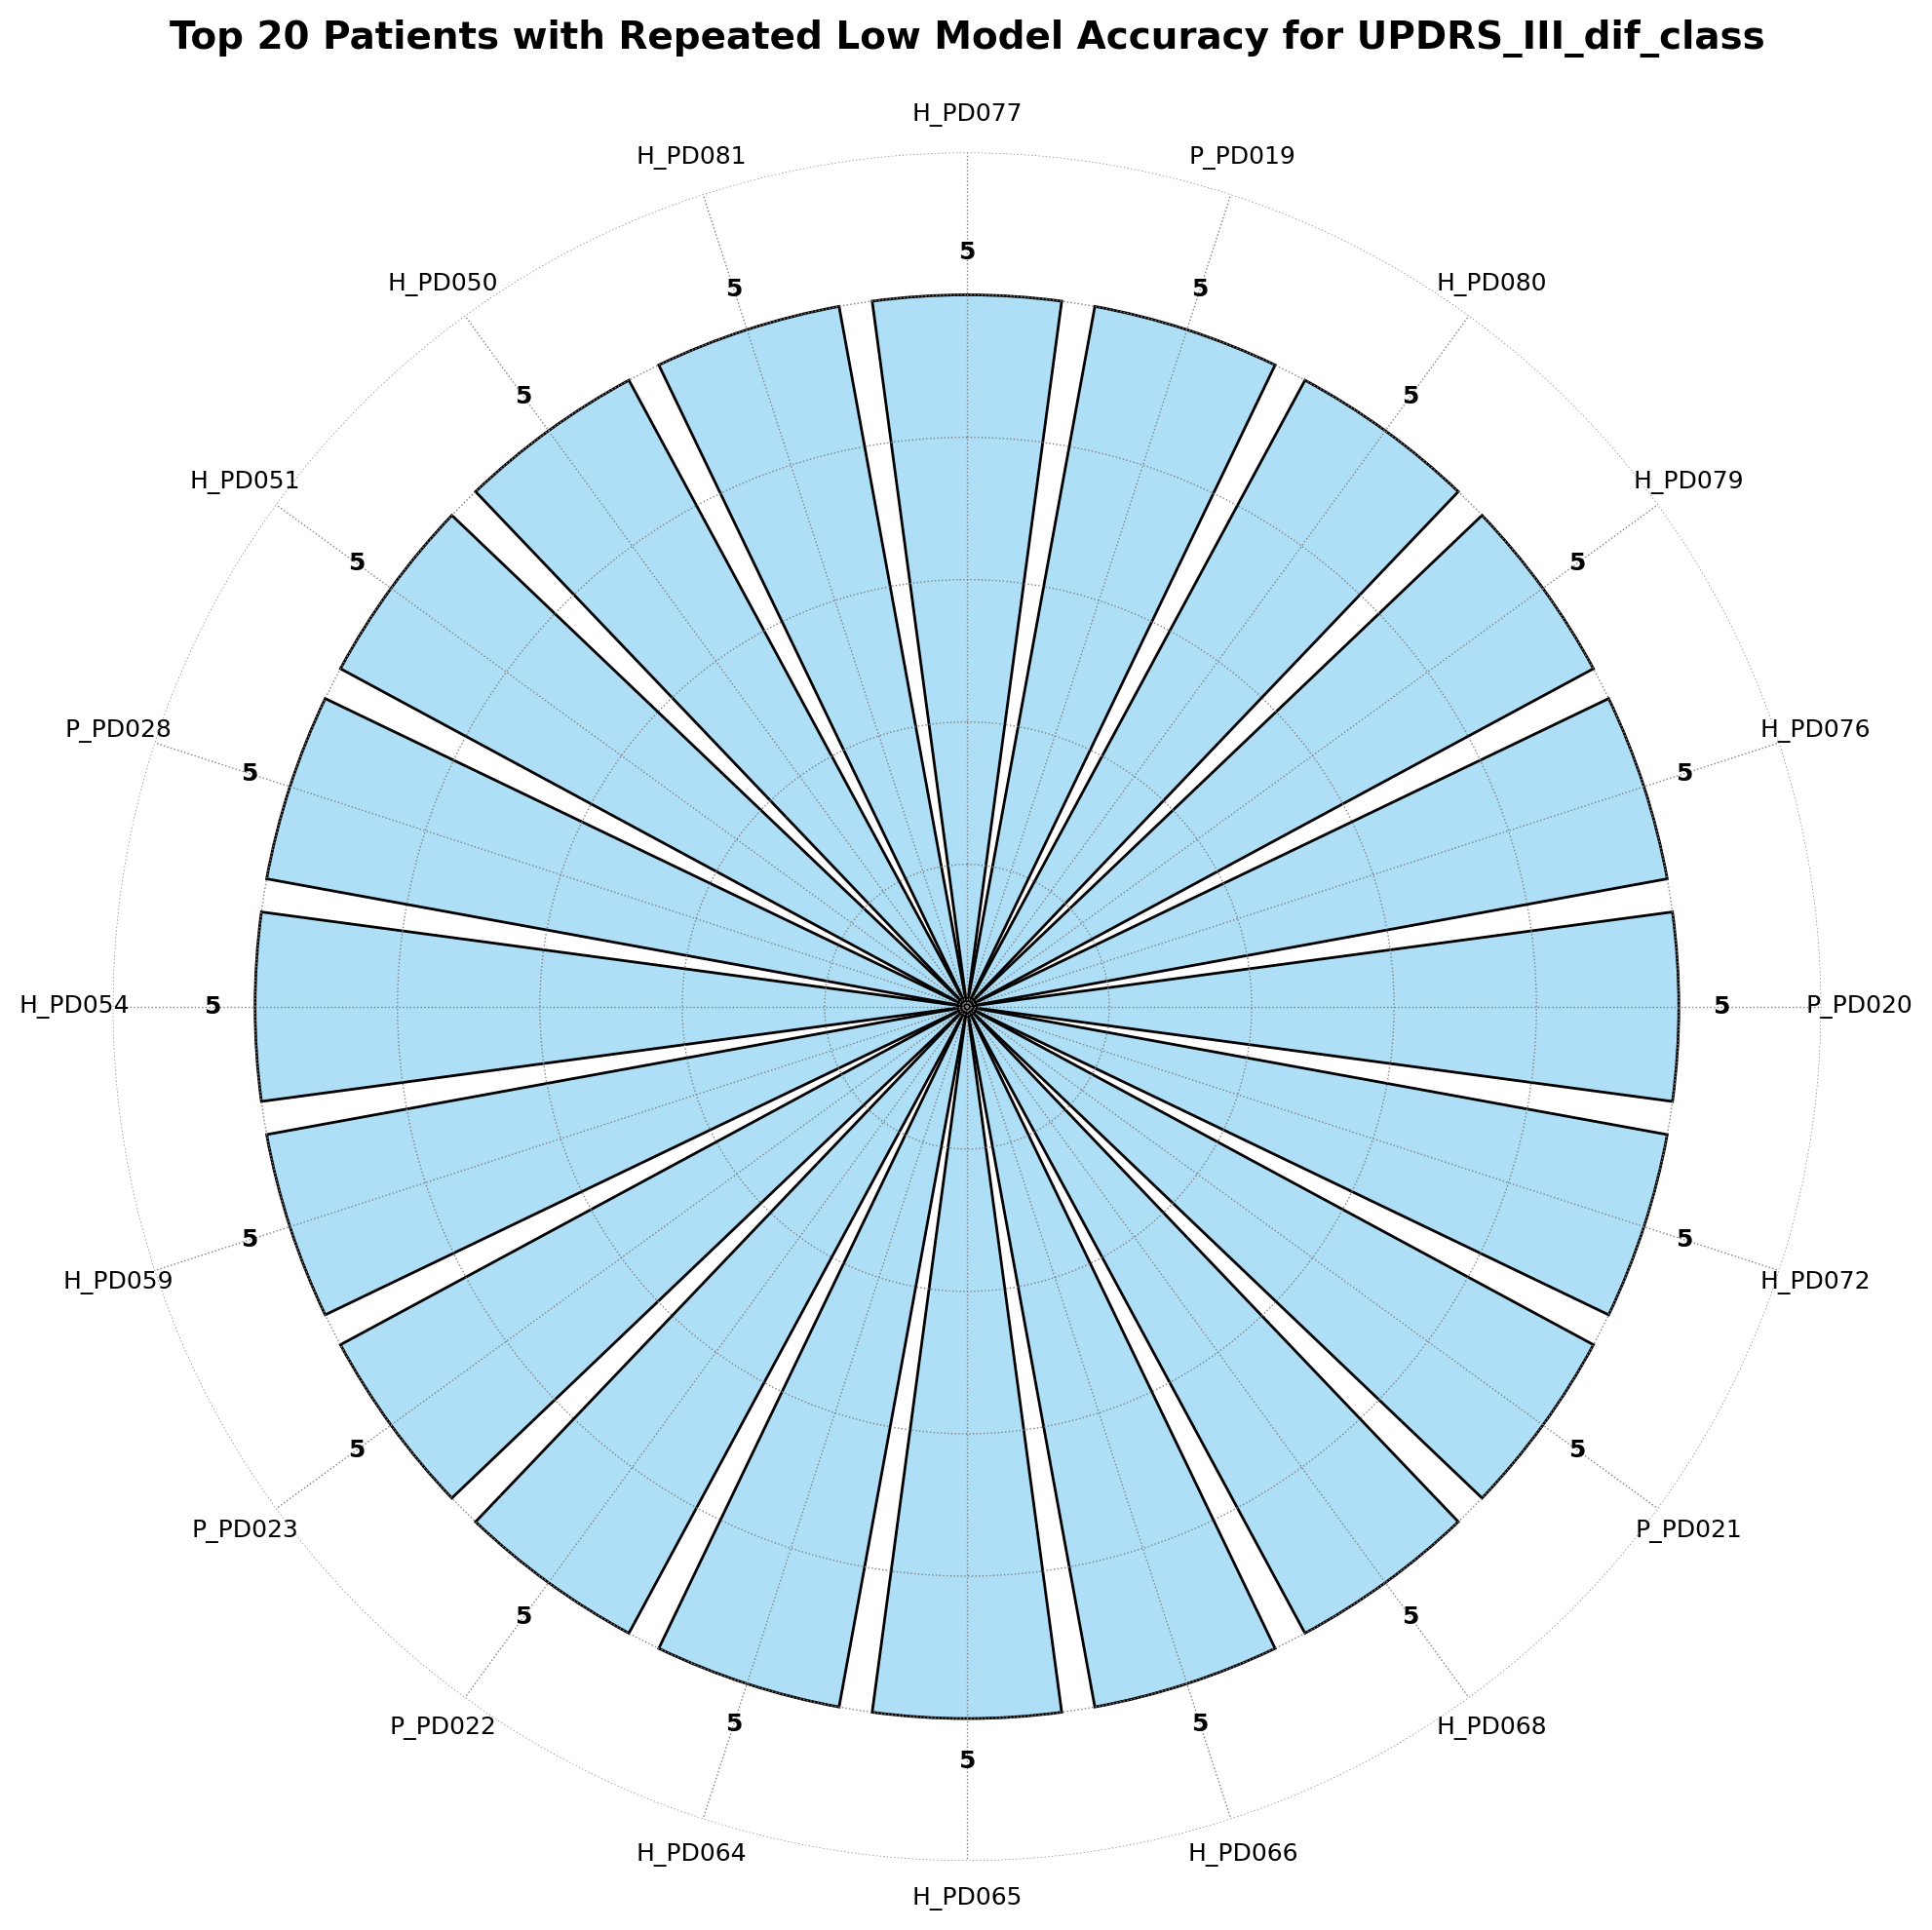

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Δεδομένα – Top 20
data = {
    'Patient': [
        'H_PD077', 'P_PD019', 'H_PD080', 'H_PD079', 'H_PD076',
        'P_PD020', 'H_PD072', 'P_PD021', 'H_PD068', 'H_PD066',
        'H_PD065', 'H_PD064', 'P_PD022', 'P_PD023', 'H_PD059',
        'H_PD054', 'P_PD028', 'H_PD051', 'H_PD050', 'H_PD081'
    ],
    'Low Accuracy Count': [
        5, 5, 5, 5, 5,
        5, 5, 5, 5, 5,
        5, 5, 5, 5, 5,
        5, 5, 5, 5, 5
    ]
}
df = pd.DataFrame(data)

# Βασικά στοιχεία
labels = df['Patient']
values = df['Low Accuracy Count']
num_bars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()

# Δημιουργία figure
plt.figure(figsize=(10, 10), dpi=200)
ax = plt.subplot(111, polar=True)

# Μπάρες
bars = ax.bar(
    angles,
    values,
    width=2*np.pi/num_bars * 0.85,
    bottom=0,
    color='#AEDFF7',  # pastel baby blue
    edgecolor='black',
    linewidth=1
)

# Κατεύθυνση - περιστροφή
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, max(values) + 1)

# Labels (ονόματα)
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=9)

# Απόκρυψη κυκλικών γραμμών και y-axis
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
ax.grid(color='gray', linestyle='dotted', linewidth=0.5)

# Τίτλος
plt.title('Top 20 Patients with Repeated Low Model Accuracy for UPDRS_III_dif_class', fontsize=14, fontweight='bold', pad=20)

# Τιμές πάνω στις μπάρες
for angle, value in zip(angles, values):
    ax.text(
        angle,
        value + 0.3,  # μικρή απόσταση από την κορυφή
        str(value),
        ha='center',
        va='center',
        fontsize=9,
        color='black',
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig("radial_top20_patients_UPDRS_III_dif_class.png", dpi=300, bbox_inches='tight')
plt.show()



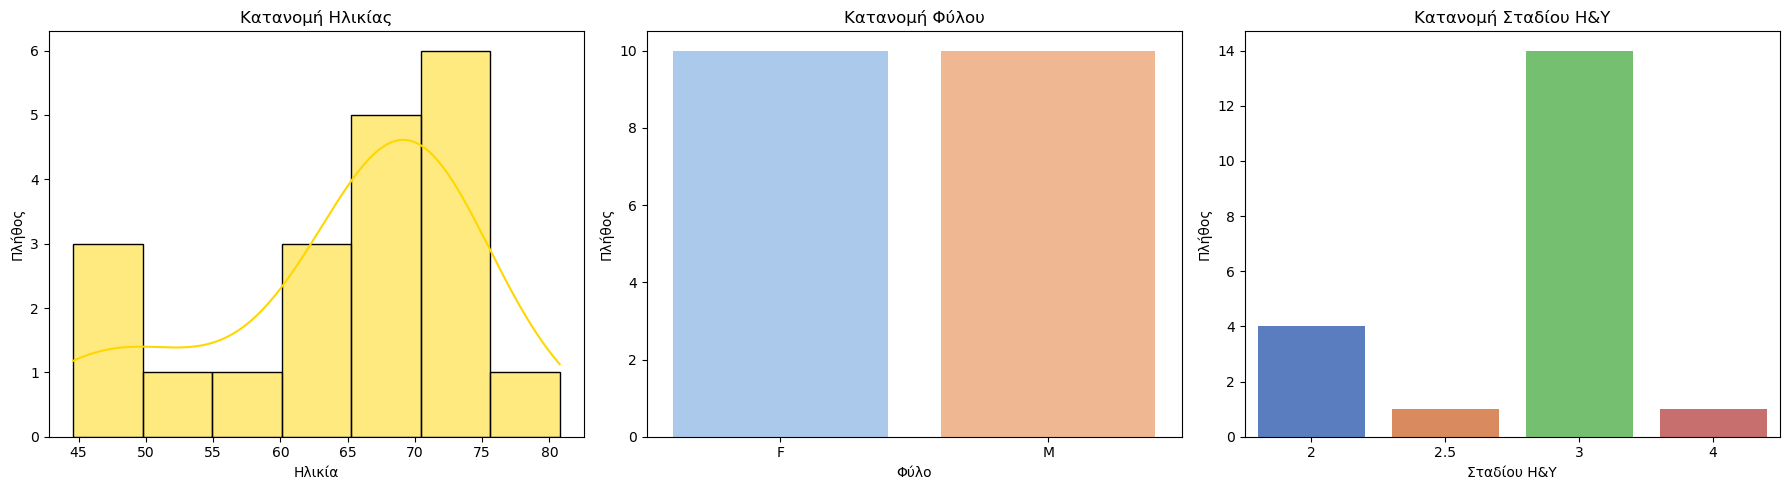

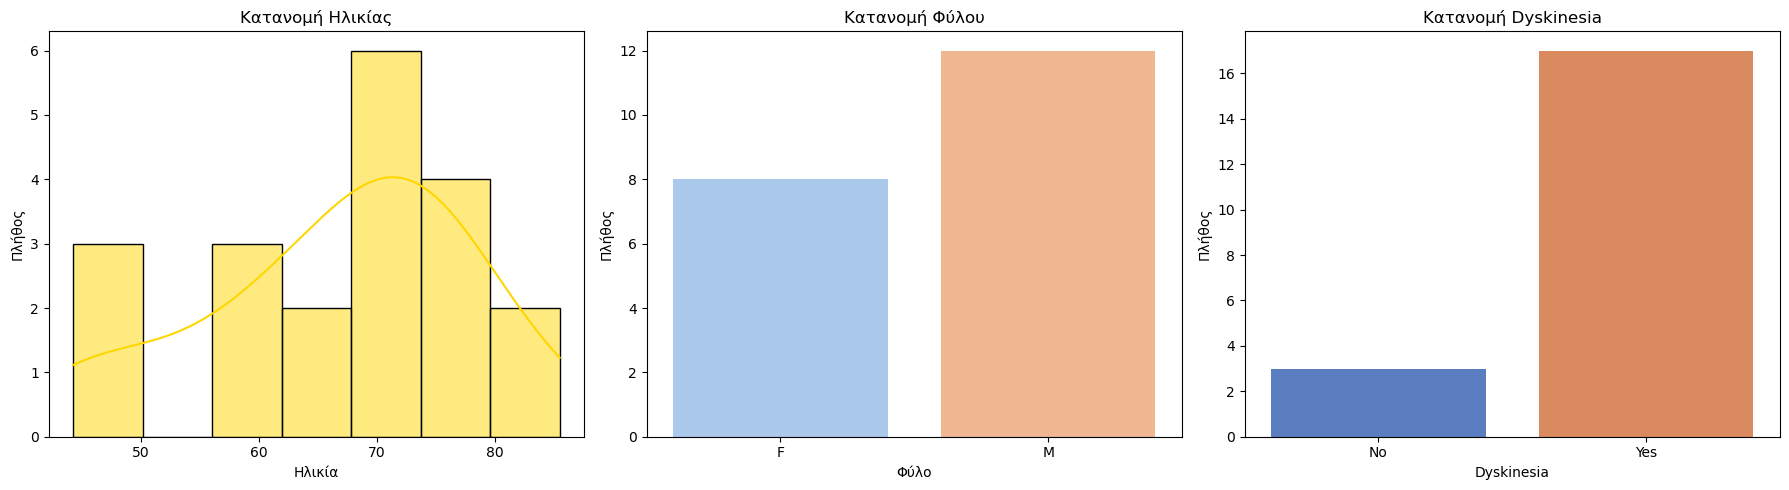

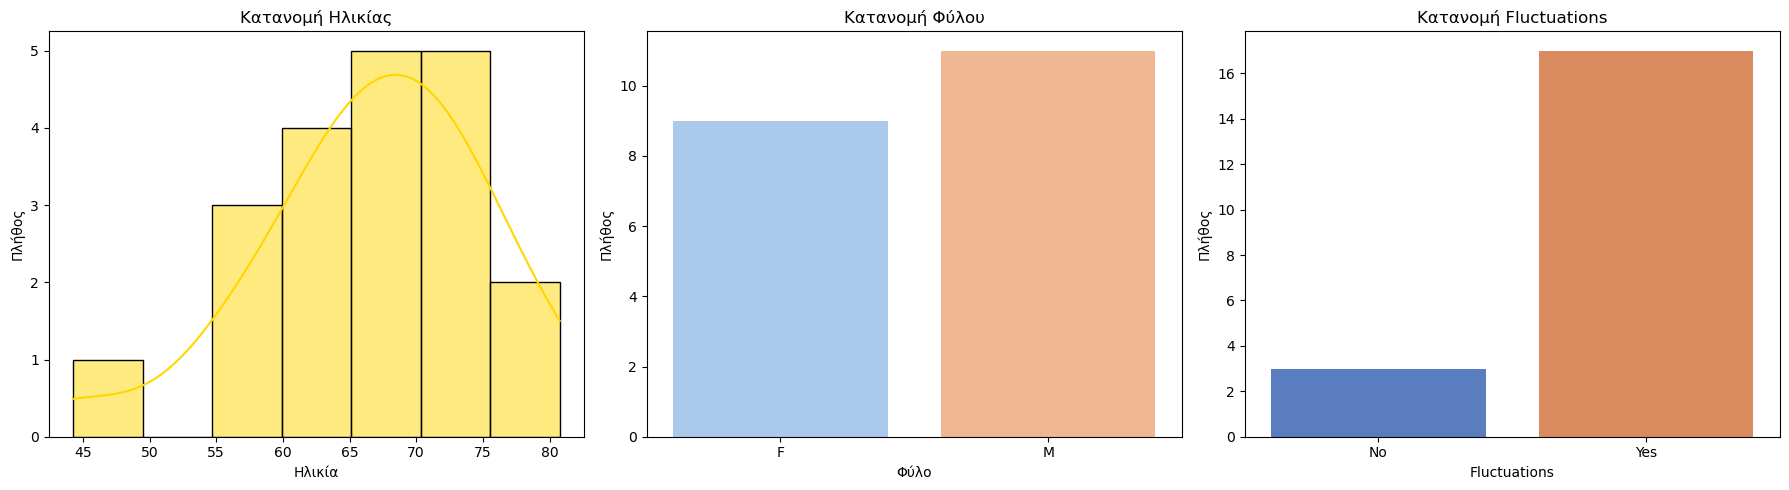

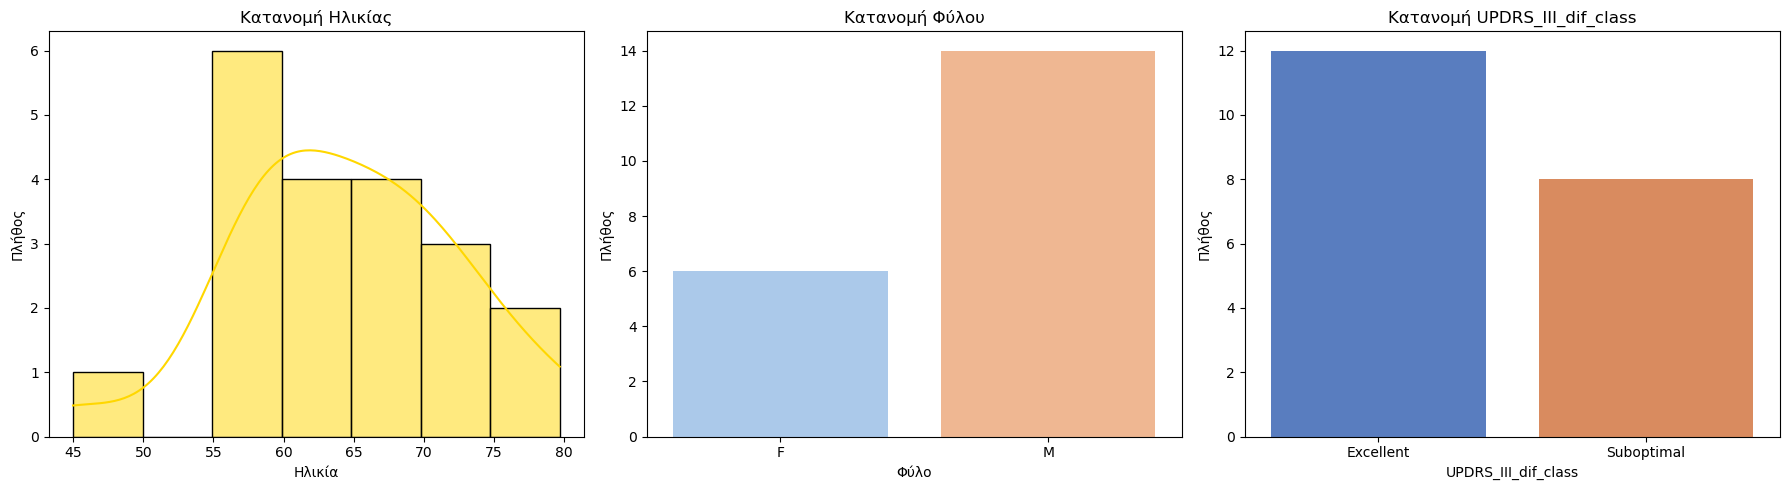

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/1416535719.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = df_unique[col].round(1).astype(str)


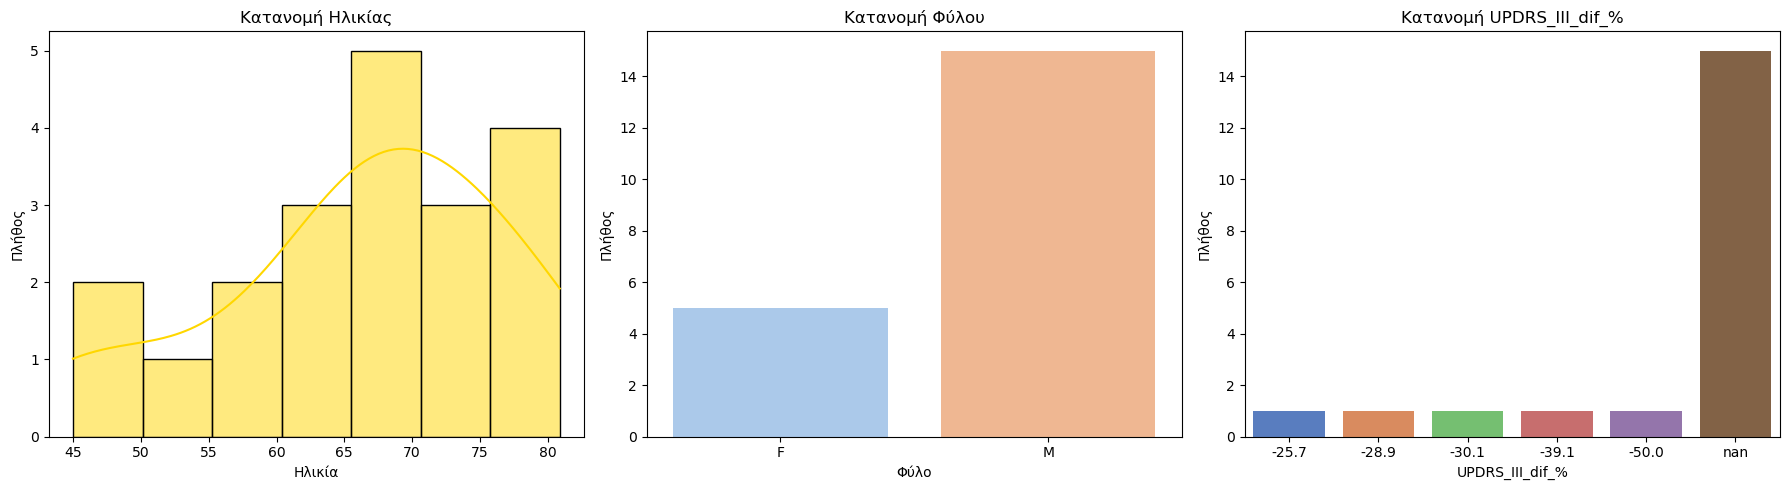

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Φόρτωσε το Excel αρχείο σου
features_df = pd.read_excel('Features_PATRA_HERAKLEION.xlsx')

# 🧼 Κράτησε τις στήλες που χρειάζεσαι και αφαίρεσε διπλότυπα
filtered_df = features_df[['Patient', 'Age', 'Sex', 'H&Y', 'Dyskinesia', 'Fluctuations',
                           'UPDRS_III_dif_class', 'UPDRS_III_dif_per']].drop_duplicates()

# 🔠 Καθάρισε το φύλο (F/M)
filtered_df['Sex'] = filtered_df['Sex'].str.upper()

# 🧾 Λίστες με ασθενείς χαμηλής ακρίβειας ανά κατηγορία
hy_patients = ['H_PD060', 'H_PD078', 'H_PD097', 'H_PD039', 'P_PD028',
               'P_PD053', 'P_PD032', 'H_PD057', 'H_PD086', 'H_PD087',
               'H_PD052', 'H_PD090', 'P_PD003', 'H_PD071', 'P_PD018',
               'P_PD030', 'P_PD014', 'P_PD046', 'P_PD050', 'P_PD049']

dysk_patients = ['H_PD033', 'H_PD035', 'H_PD004', 'P_PD017', 'H_PD087',
                 'H_PD052', 'H_PD058', 'H_PD037', 'H_PD047', 'H_PD048',
                 'H_PD054', 'H_PD057', 'H_PD051', 'H_PD059', 'H_PD030',
                 'H_PD063', 'H_PD069', 'H_PD077', 'H_PD078', 'H_PD095']

fluct_patients = ['H_PD037', 'H_PD034', 'H_PD023', 'H_PD019', 'H_PD052',
                  'H_PD057', 'H_PD038', 'H_PD059', 'H_PD033', 'H_PD030',
                  'H_PD029', 'H_PD027', 'H_PD026', 'H_PD065', 'H_PD044',
                  'H_PD071', 'H_PD097', 'H_PD004', 'H_PD007', 'H_PD078']

updrs_class_patients = ['P_PD028', 'P_PD011', 'P_PD031', 'P_PD034', 'P_PD035',
                        'P_PD017', 'P_PD039', 'P_PD040', 'P_PD044', 'P_PD046',
                        'P_PD043', 'P_PD002', 'P_PD045', 'P_PD038', 'P_PD048',
                        'P_PD049', 'P_PD032', 'P_PD050', 'P_PD030', 'P_PD029']

updrs_per_patients = ['H_PD077', 'P_PD019', 'H_PD080', 'H_PD079', 'H_PD076',
                      'P_PD020', 'H_PD072', 'P_PD021', 'H_PD068', 'H_PD066',
                      'H_PD065', 'H_PD064', 'P_PD022', 'P_PD023', 'H_PD059',
                      'H_PD054', 'P_PD028', 'H_PD051', 'H_PD050', 'H_PD081']
def create_ordered_category_plot(patient_list, col, col_title, filename_prefix):
    import matplotlib.pyplot as plt
    import seaborn as sns

    df = filtered_df[filtered_df['Patient'].isin(patient_list)].copy()
    df_unique = df.drop_duplicates(subset='Patient')

    # Αν είναι αριθμός (π.χ. H&Y, UPDRS_III_dif_per), στρογγυλοποίησε για πιο καθαρό axis
    if pd.api.types.is_numeric_dtype(df_unique[col]):
        if col == 'H&Y':
            df_unique[col] = df_unique[col].astype(str)  # αντιμετώπισέ το ως κατηγορικό
        elif col == 'UPDRS_III_dif_per':
            df_unique[col] = df_unique[col].round(1).astype(str)

    # Φτιάξε φυσική σειρά τιμών
    ordered = sorted(df_unique[col].dropna().unique(), key=lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else str(x))

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Ηλικία
    sns.histplot(data=df_unique, x='Age', kde=True, bins=7, color='gold', ax=axes[0])
    axes[0].set_title('Κατανομή Ηλικίας')
    axes[0].set_xlabel('Ηλικία')
    axes[0].set_ylabel('Πλήθος')

    # Φύλο
    sns.countplot(data=df_unique, x='Sex', palette='pastel', ax=axes[1], order=['F', 'M'])
    axes[1].set_title('Κατανομή Φύλου')
    axes[1].set_xlabel('Φύλο')
    axes[1].set_ylabel('Πλήθος')

    # Κατηγορία
    sns.countplot(data=df_unique, x=col, palette='muted', ax=axes[2], order=ordered)
    axes[2].set_title(f'Κατανομή {col_title}')
    axes[2].set_xlabel(col_title)
    axes[2].set_ylabel('Πλήθος')

    plt.tight_layout()
    plt.savefig(f'{filename_prefix}_final_cleaned.png', dpi=300)
    plt.show()
 

# 📊 Δημιούργησε τα διαγράμματα
create_ordered_category_plot(hy_patients, 'H&Y', 'Σταδίου H&Y', 'hy')
create_ordered_category_plot(dysk_patients, 'Dyskinesia', 'Dyskinesia', 'dyskinesia')
create_ordered_category_plot(fluct_patients, 'Fluctuations', 'Fluctuations', 'fluctuations')
create_ordered_category_plot(updrs_class_patients, 'UPDRS_III_dif_class', 'UPDRS_III_dif_class', 'updrs_class')
create_ordered_category_plot(updrs_per_patients, 'UPDRS_III_dif_per', 'UPDRS_III_dif_%', 'updrs_per')


In [4]:
pip install scikit-posthocs


  Obtaining dependency information for scikit-posthocs from https://files.pythonhosted.org/packages/d6/21/506f0ab734ad73f9215b09e04a05b393170c391349778f0c676a7b88cb7a/scikit_posthocs-0.11.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = df_unique[col].astype(str)


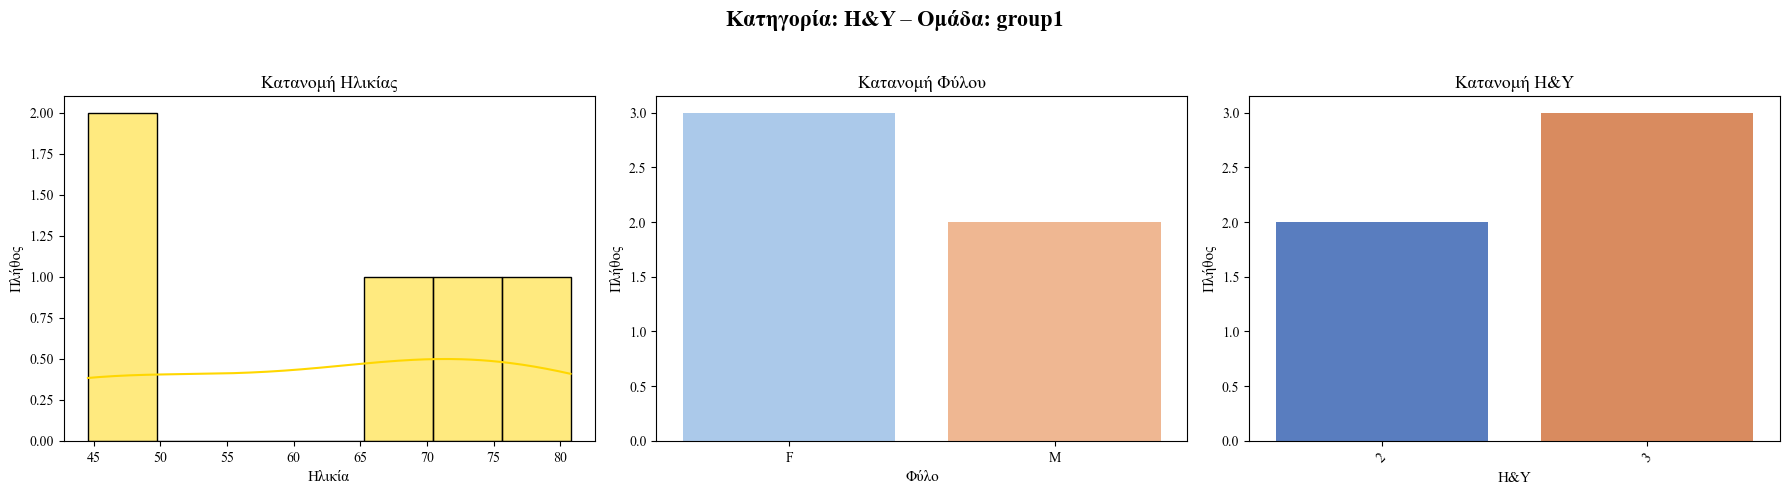

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = df_unique[col].astype(str)


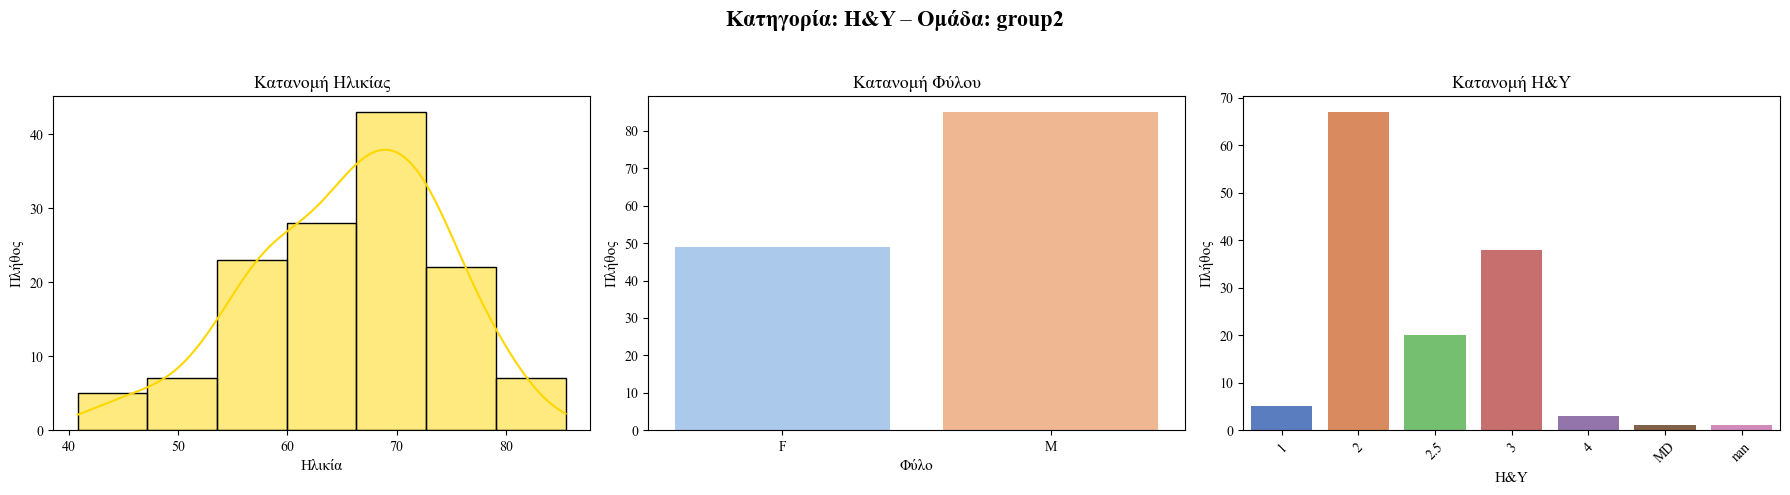

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = df_unique[col].astype(str)


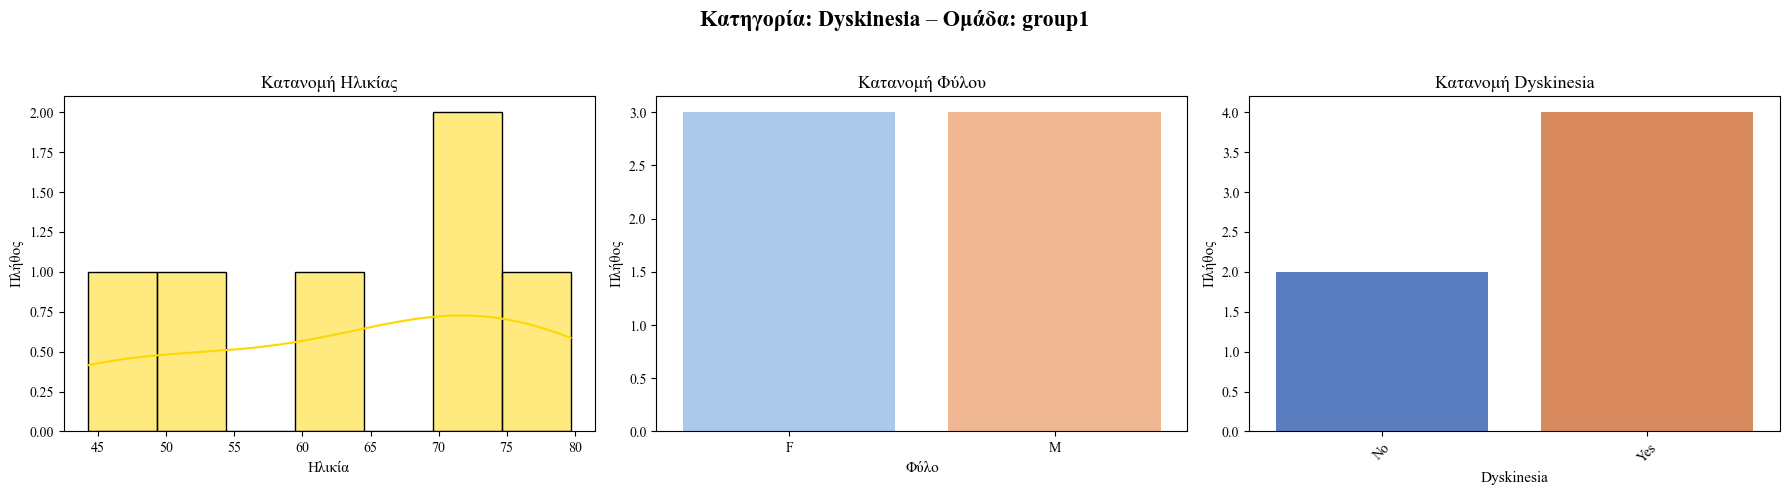

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = df_unique[col].astype(str)


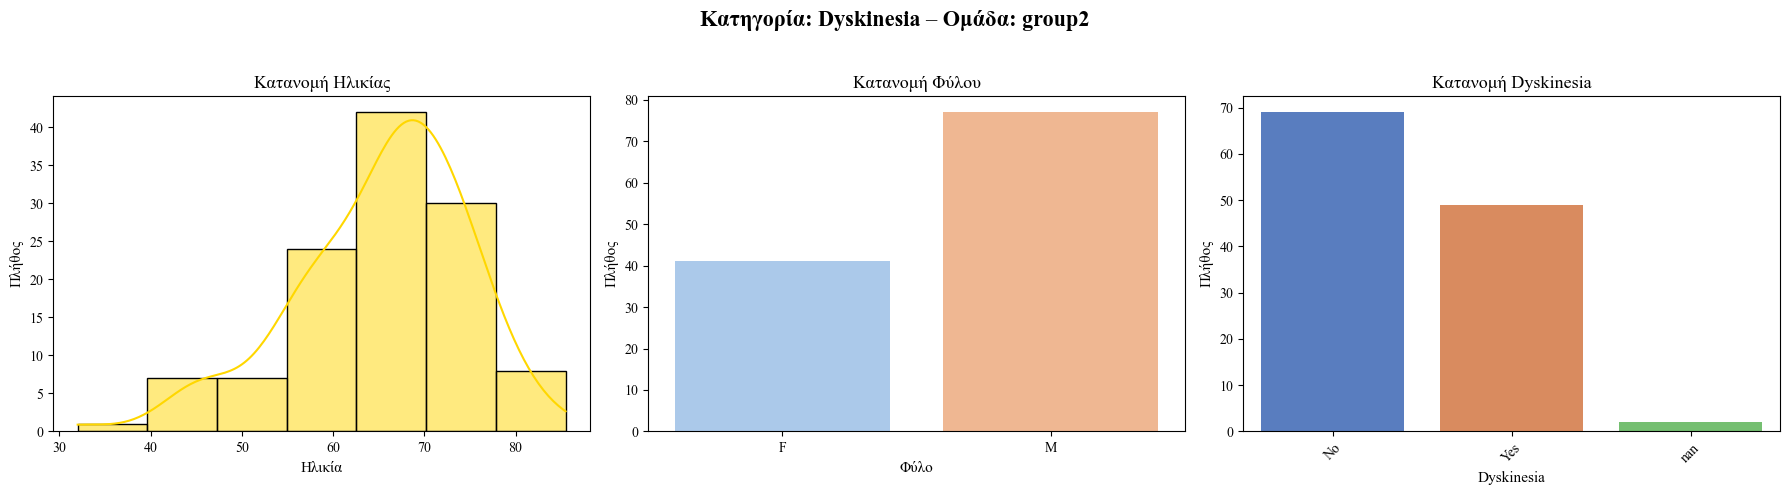

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = df_unique[col].astype(str)


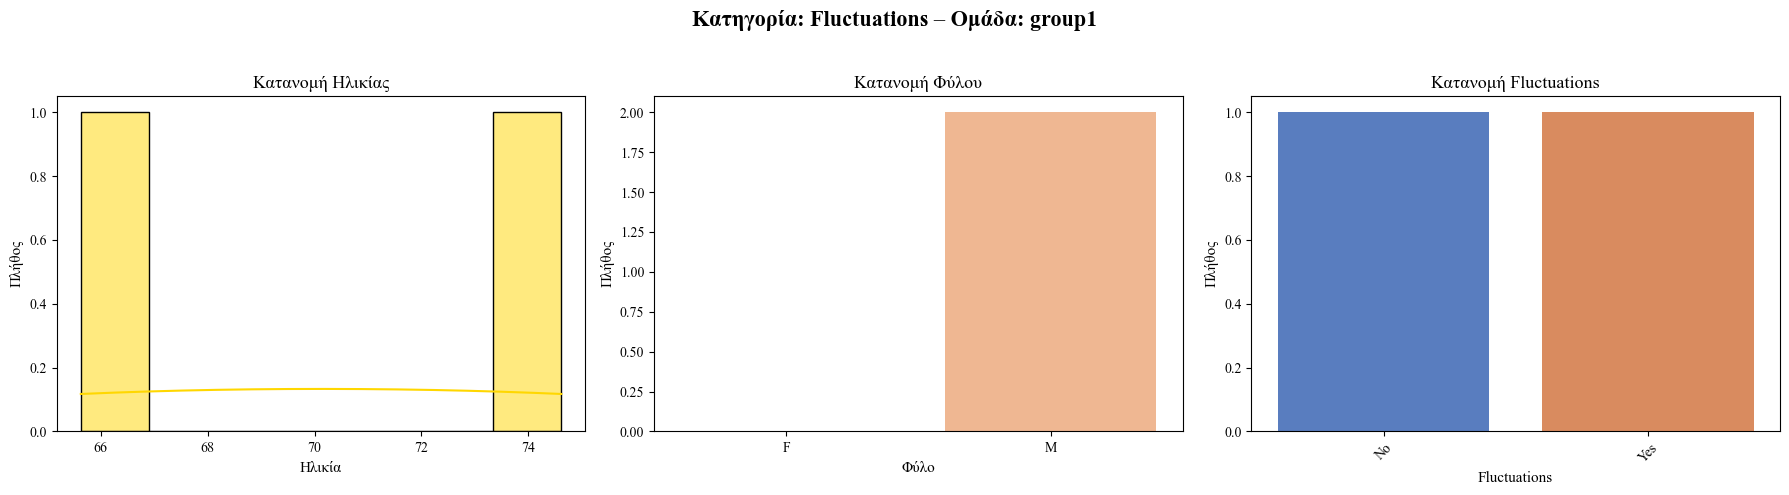

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = df_unique[col].astype(str)


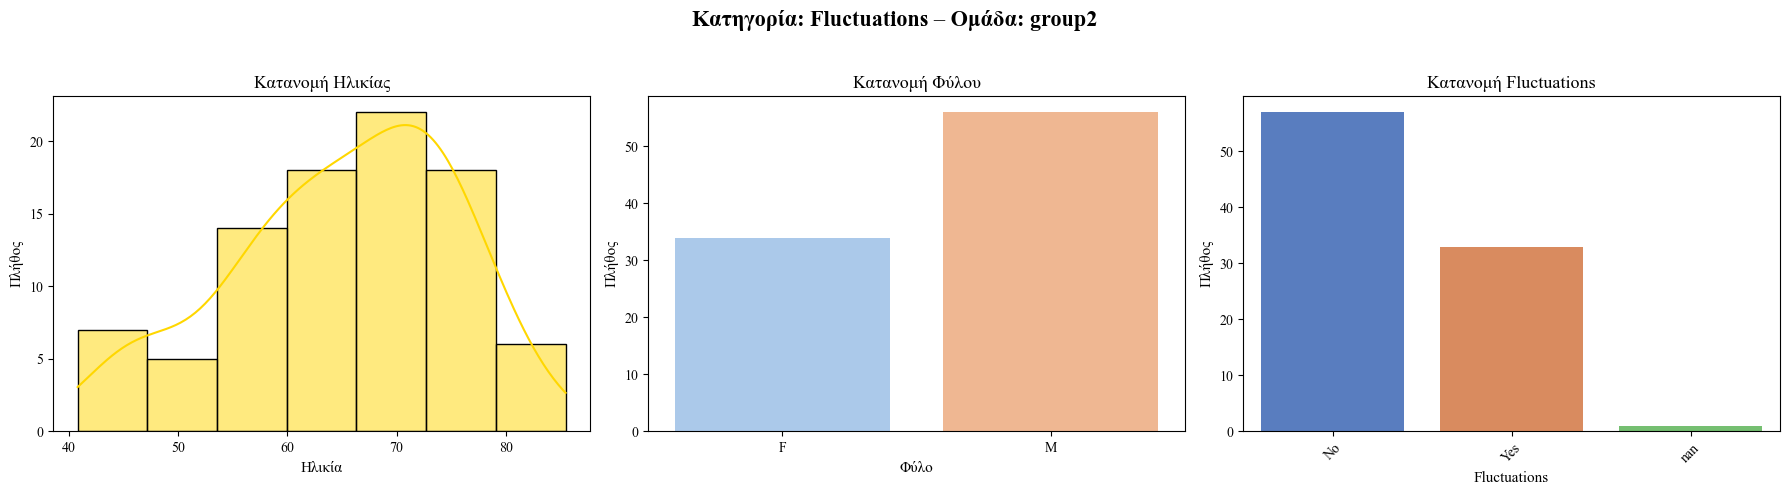

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = df_unique[col].astype(str)


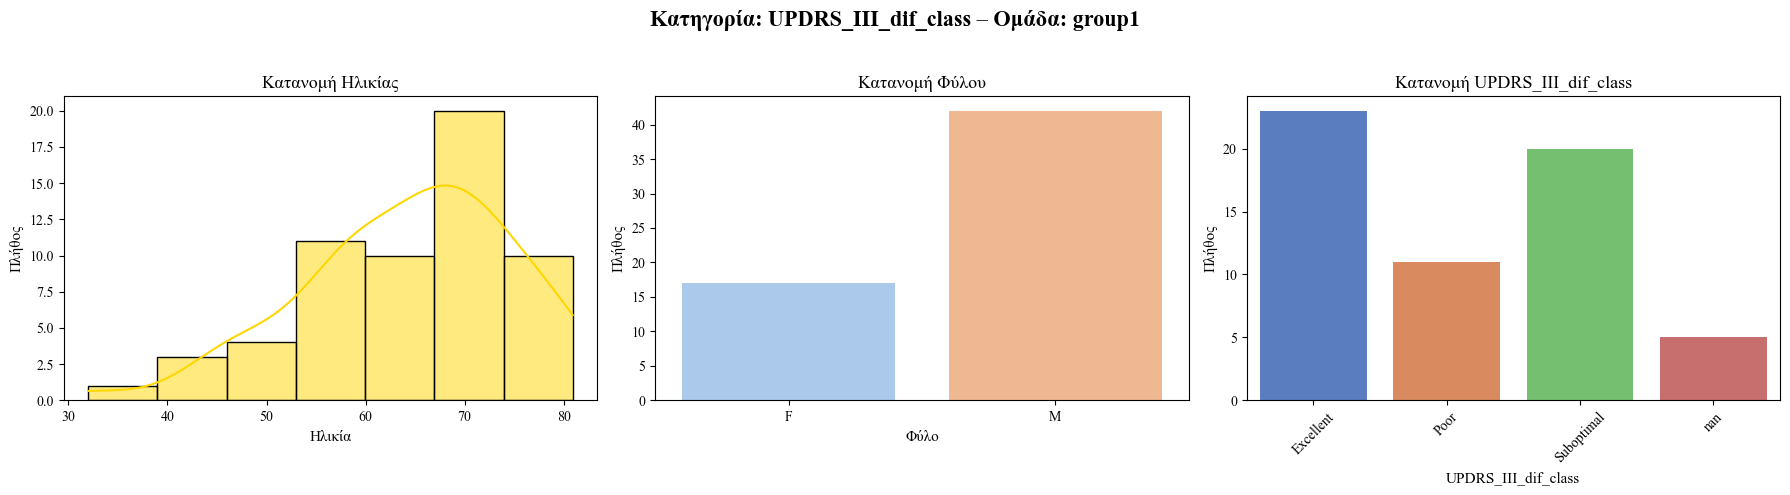

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = df_unique[col].astype(str)


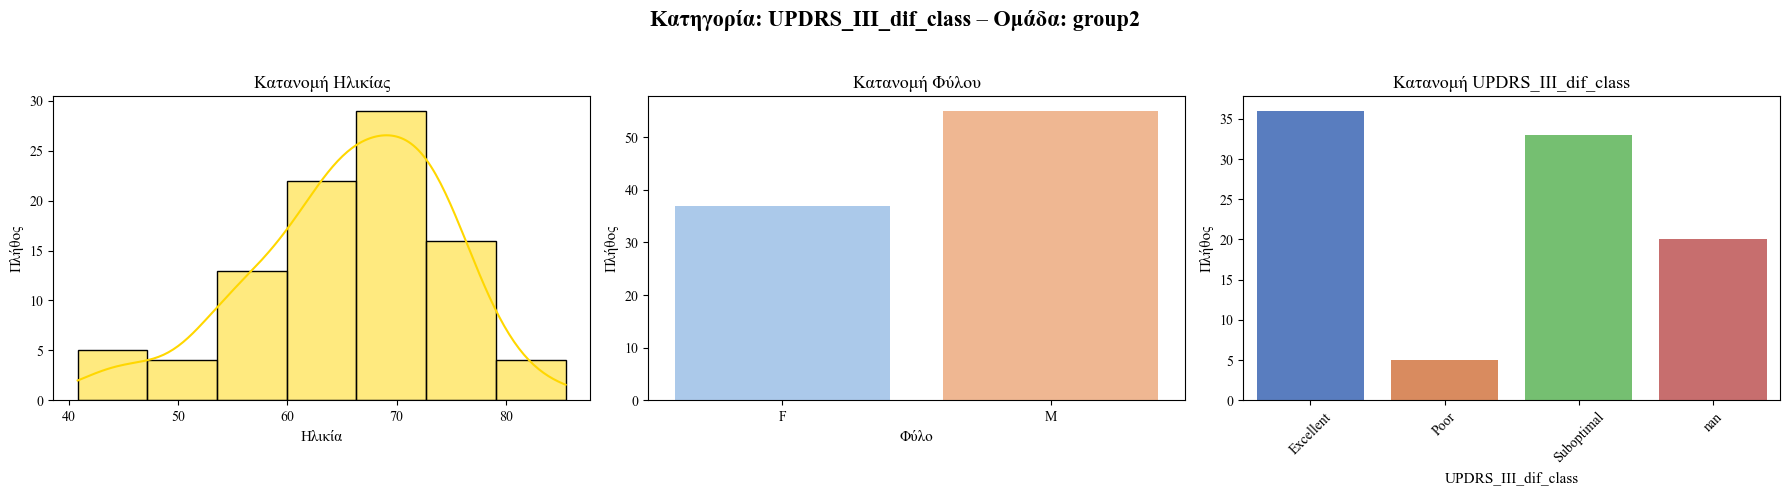

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = pd.to_numeric(df_unique[col], errors='coerce')


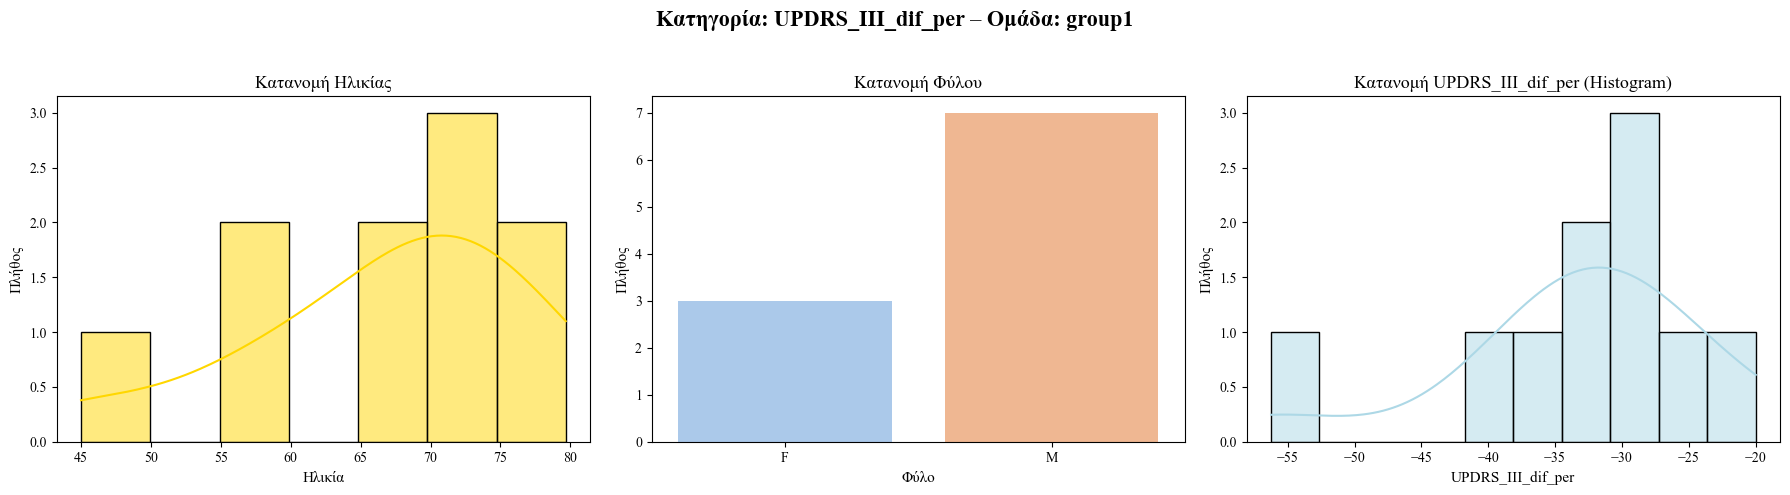

/var/folders/1m/g73y8g1d17s_z9d8k_jxxsw00000gn/T/ipykernel_39508/3694473056.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[col] = pd.to_numeric(df_unique[col], errors='coerce')


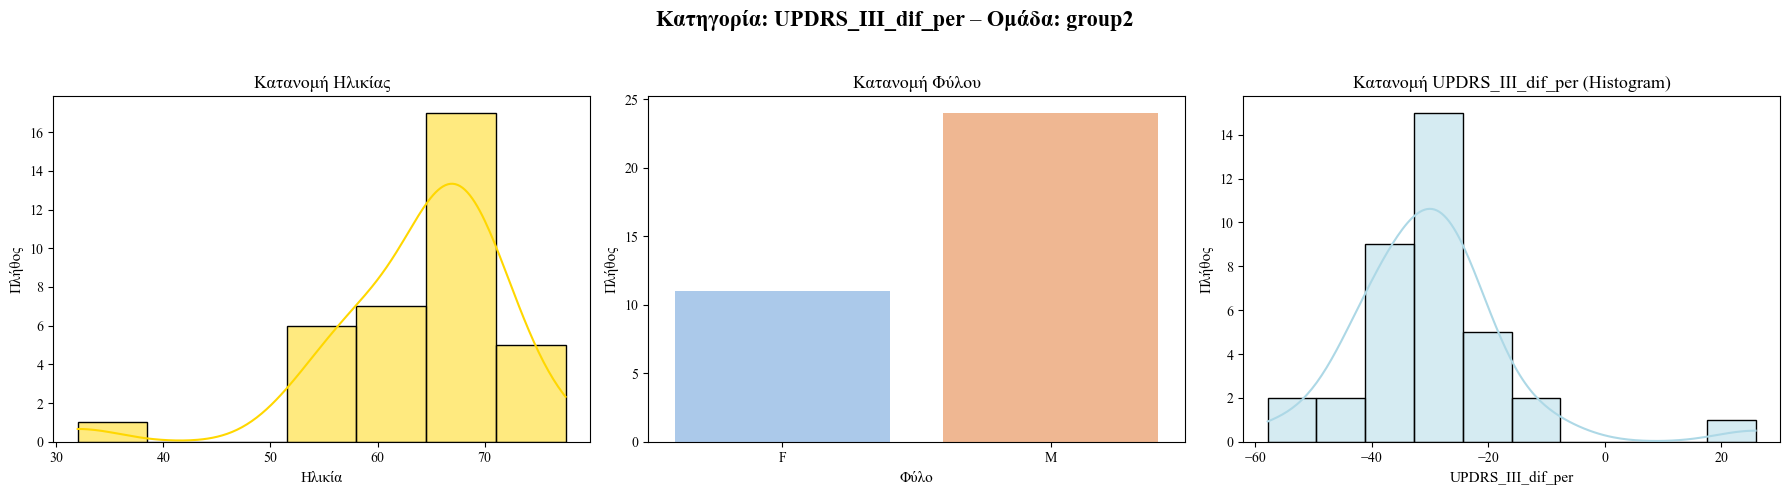

In [12]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📁 Δημιουργία φακέλου αποθήκευσης
os.makedirs("patients", exist_ok=True)

# 📥 Φόρτωσε το αρχείο χαρακτηριστικών
features_df = pd.read_excel('Features_PATRA_HERAKLEION.xlsx')

# 🧼 Καθαρισμός
filtered_df = features_df[['Patient', 'Age', 'Sex', 'H&Y', 'Dyskinesia', 'Fluctuations',
                           'UPDRS_III_dif_class', 'UPDRS_III_dif_per']].drop_duplicates()
filtered_df['Sex'] = filtered_df['Sex'].str.upper()

# 📄 Αρχεία με ασθενείς χαμηλής απόδοσης
category_files = {
    'H&Y': 'Αποτελέσματα_Ανά_Ασθενή_H&Y.xlsx',
    'Dyskinesia': 'Αποτελέσματα_Ανά_Ασθενή_dyskinesia.xlsx',
    'Fluctuations': 'Αποτελέσματα_Ανά_Ασθενή_F.xlsx',
    'UPDRS_III_dif_class': 'Αποτελέσματα_Ανά_Ασθενή_UPDRS_III_dif_clas.xlsx',
    'UPDRS_III_dif_per': 'Αποτελέσματα_Ανά_Ασθενή_UPDRS_III_dif_per.xlsx'
}

# 📊 Ομαδοποίηση ασθενών
low_accuracy_groups = {}
for category, file in category_files.items():
    df = pd.read_excel(file, sheet_name='Χαμηλή_Απόδοση_Ασθενών')
    group1 = df[df['Low Accuracy Count'] == 5]['Patient'].tolist()
    group2 = df[df['Low Accuracy Count'] < 5]['Patient'].tolist()
    low_accuracy_groups[category] = {'group1': group1, 'group2': group2}


# 🎨 Συνάρτηση για δημιουργία διαγραμμάτων
def create_ordered_category_plot(patient_list, col, col_title, group_name, filename_prefix):
    df = filtered_df[filtered_df['Patient'].isin(patient_list)].copy()
    df_unique = df.drop_duplicates(subset='Patient')

    # Μετατροπή τιμών σε string (εκτός από ειδική περίπτωση)
    if col != 'UPDRS_III_dif_per':
        df_unique[col] = df_unique[col].astype(str)

    # Ταξινόμηση τιμών για x-axis (εκτός από dif_per)
    if col != 'UPDRS_III_dif_per':
        try:
            ordered = sorted(df_unique[col].dropna().unique(), key=lambda x: float(x))
        except ValueError:
            ordered = sorted(df_unique[col].dropna().unique())

    # Times New Roman για όλα
    plt.rcParams.update({'font.family': 'Times New Roman'})

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Κατηγορία: {col_title} – Ομάδα: {group_name}', fontsize=16, fontweight='bold')

    # Ηλικία
    sns.histplot(data=df_unique, x='Age', kde=True, bins=7, color='gold', ax=axes[0])
    axes[0].set_title('Κατανομή Ηλικίας', fontsize=13)
    axes[0].set_xlabel('Ηλικία', fontsize=11)
    axes[0].set_ylabel('Πλήθος', fontsize=11)

    # Φύλο
    sns.countplot(data=df_unique, x='Sex', palette='pastel', ax=axes[1], order=['F', 'M'])
    axes[1].set_title('Κατανομή Φύλου', fontsize=13)
    axes[1].set_xlabel('Φύλο', fontsize=11)
    axes[1].set_ylabel('Πλήθος', fontsize=11)

    # Κατηγορία
    if col == 'UPDRS_III_dif_per':
        df_unique[col] = pd.to_numeric(df_unique[col], errors='coerce')
        sns.histplot(data=df_unique, x=col, bins=10, kde=True, color='lightblue', ax=axes[2])
        axes[2].set_title(f'Κατανομή {col_title} (Histogram)', fontsize=13)
        axes[2].set_xlabel(col_title, fontsize=11)
        axes[2].set_ylabel('Πλήθος', fontsize=11)
    else:
        sns.countplot(data=df_unique, x=col, palette='muted', ax=axes[2], order=ordered)
        axes[2].set_title(f'Κατανομή {col_title}', fontsize=13)
        axes[2].set_xlabel(col_title, fontsize=11)
        axes[2].set_ylabel('Πλήθος', fontsize=11)
        axes[2].tick_params(axis='x', labelrotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'patients/{filename_prefix}_final_cleaned.png', dpi=300)
    plt.show()


# ▶️ Εκτέλεση για κάθε group & κατηγορία
for category, groups in low_accuracy_groups.items():
    for group_name, patients in groups.items():
        create_ordered_category_plot(
            patient_list=patients,
            col=category,
            col_title=category,
            group_name=group_name,
            filename_prefix=f'{category}_{group_name}'
        )
